In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import colors
import seaborn as sns
import pandas as pd
style.use('seaborn-v0_8-paper')

# **I.2D Ising Model**

In [ ]:
#lets do step by step as mentioned in the text
class IsingModel:

  def __init__(self, netsize, available_spins, J, T):
    '''
    in this function i just create, network and save some of the related parameters such as T and J
    '''
    if isinstance(netsize, int):
      self.L_ = netsize
      self.net_ = np.random.choice(available_spins, size = (netsize, netsize))
    else:
      self.L_ = netsize.shape[0]
      self.net_ = netsize.copy()
    self.T_ = T
    self.spins_ = available_spins
    self.j_ = J
    self.J_ = J / (T)#i put k_b = 1
    delta_E = np.array([-8, -4, 0, 4, 8])
    self.values_ = {i : np.exp(-i * self.J_) for i in delta_E}
    self.magnetization_history = []




  def energy(self):
    '''
    here i calculate E for given network structure with periodic boundry condition,
    for summing all the intractions i used the same logic we used in coloring algorithm
    for counting each intraction exactly once.this is more efficient than summing
    all four neighbors and divide the result by 2.
    '''
    L = self.net_.shape[0]
    E = 0

    for i in range(L):
      for j in range(L):
        E += (self.net_[(i+1) % L, j] + self.net_[i, (j+1) % L]) * self.net_[i, j]

    return -self.j_ * E



  def delta_E(self, i, j):
    '''
    here i calculate delta E
    '''
    #i, j = np.random.randint(0, self.net_.shape[0], size = 2)
    delta = 2* self.net_[i, j] * (self.net_[(i + 1) % self.L_, j] + self.net_[(i - 1) % self.L_, j] + self.net_[i, (j + 1) % self.L_] + self.net_[i, (j - 1) % self.L_] )

    return delta


  def MCstep(self, N, s, want_visual):
    '''
    here i perform Monte Carlo step N times and i display changes in system at each
    s steps.
    '''
    if want_visual:
      plt.figure(figsize=(6,6))

    for n in range(N):
      i , j = np.random.randint(0, self.net_.shape[0], size = 2)
      dE = self.delta_E(i, j)

      if dE <= 0 or np.random.rand() < self.values_[dE]:
        self.net_[i, j] *= -1

      self.magnetization_history.append(np.abs( np.mean( self.net_)))

      if want_visual:
        if (n+1) % s == 0 :
          plt.clf()
          cmap = colors.ListedColormap(['red', 'blue'])
          plt.matshow(self.net_, cmap=cmap)
          plt.title(f'Energy={self.energy():.2f}, M={self.magnetization_history[-1]}, T = {self.T_:.2f}')
          plt.colorbar(ticks=[-1, 1])
          plt.pause(0.01)
          plt.show()

    self.m_avg = np.mean(self.magnetization_history)



<Figure size 600x600 with 0 Axes>

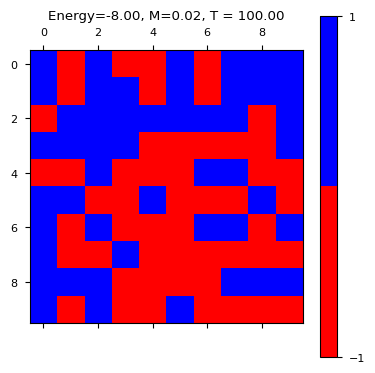

<Figure size 600x600 with 0 Axes>

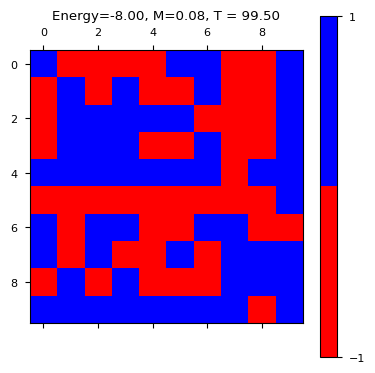

<Figure size 600x600 with 0 Axes>

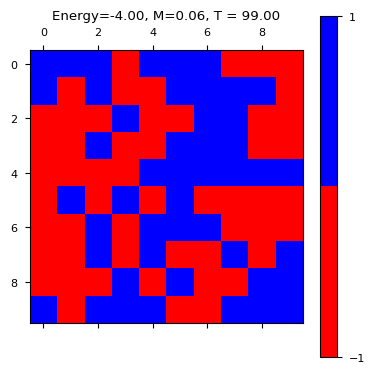

<Figure size 600x600 with 0 Axes>

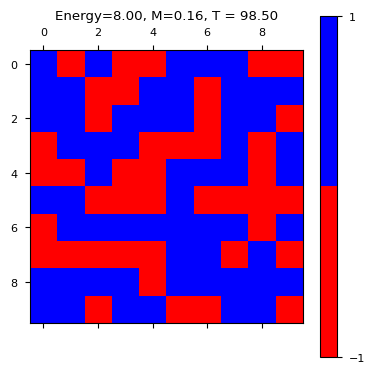

<Figure size 600x600 with 0 Axes>

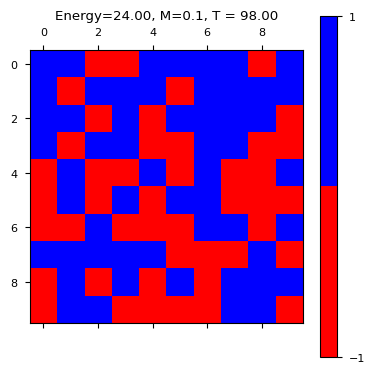

<Figure size 600x600 with 0 Axes>

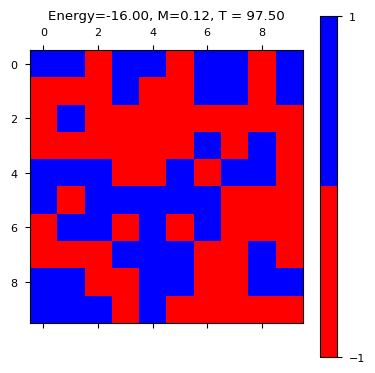

<Figure size 600x600 with 0 Axes>

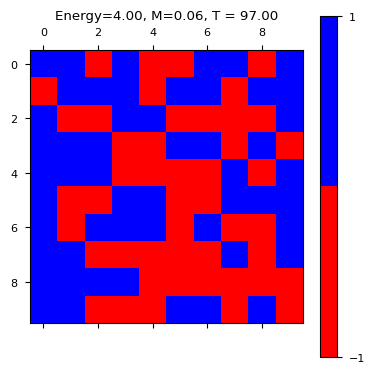

<Figure size 600x600 with 0 Axes>

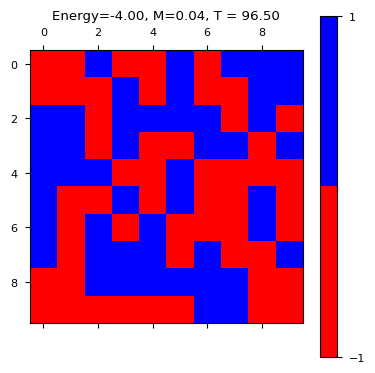

<Figure size 600x600 with 0 Axes>

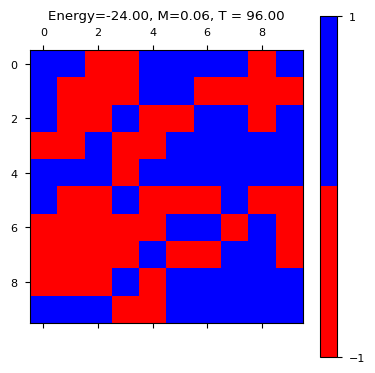

<Figure size 600x600 with 0 Axes>

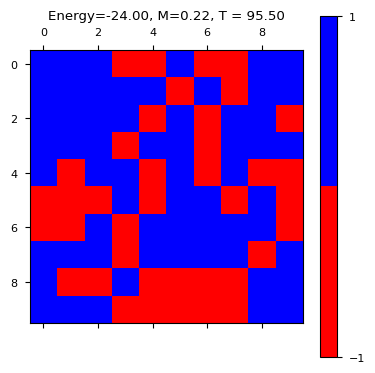

<Figure size 600x600 with 0 Axes>

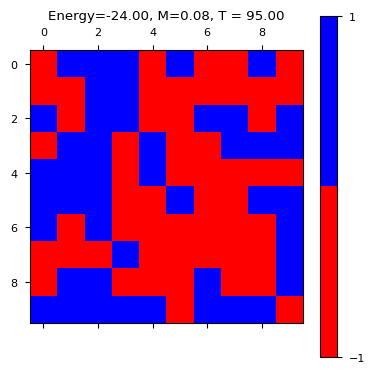

<Figure size 600x600 with 0 Axes>

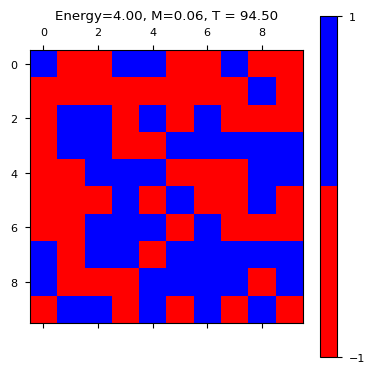

<Figure size 600x600 with 0 Axes>

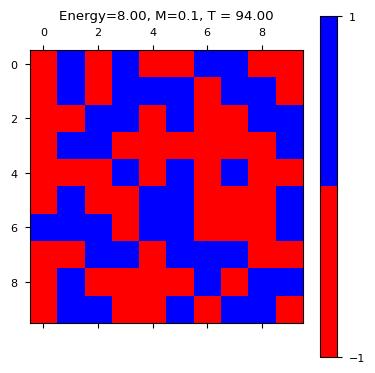

<Figure size 600x600 with 0 Axes>

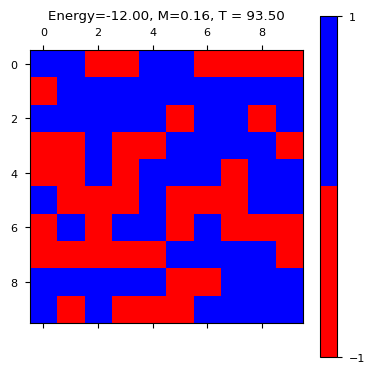

<Figure size 600x600 with 0 Axes>

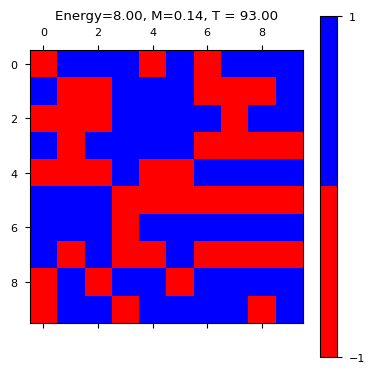

<Figure size 600x600 with 0 Axes>

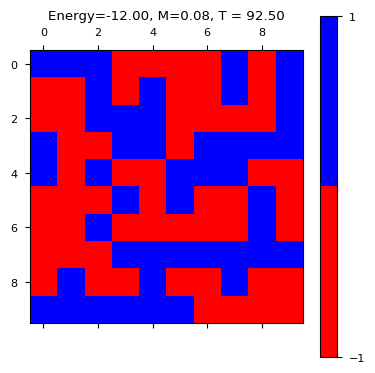

<Figure size 600x600 with 0 Axes>

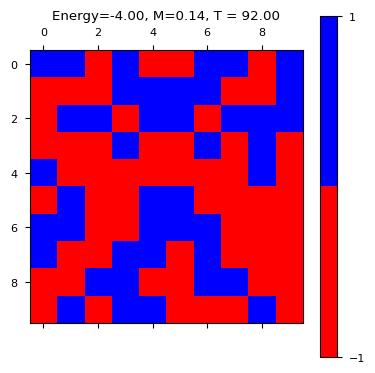

<Figure size 600x600 with 0 Axes>

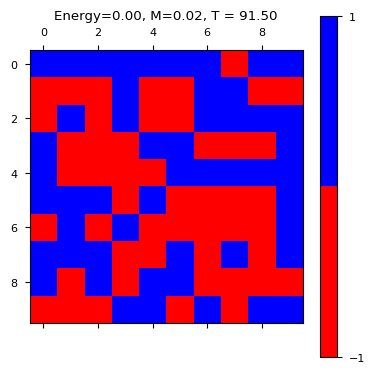

<Figure size 600x600 with 0 Axes>

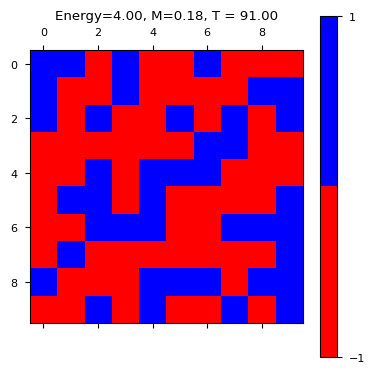

<Figure size 600x600 with 0 Axes>

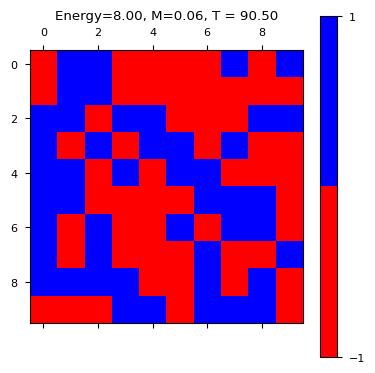

<Figure size 600x600 with 0 Axes>

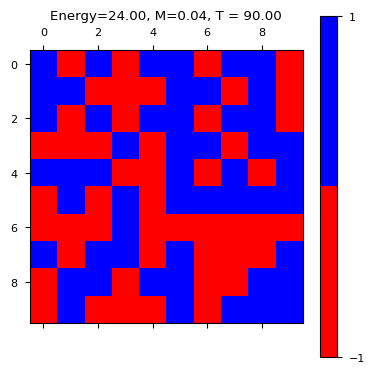

<Figure size 600x600 with 0 Axes>

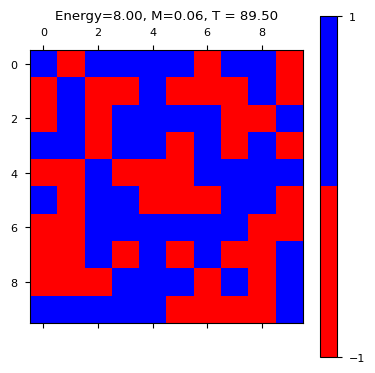

<Figure size 600x600 with 0 Axes>

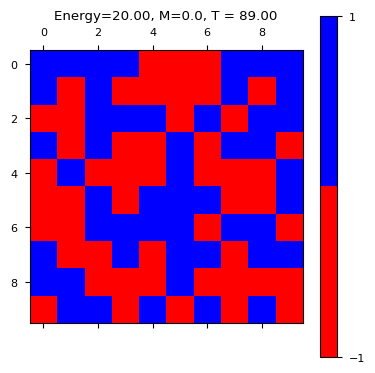

<Figure size 600x600 with 0 Axes>

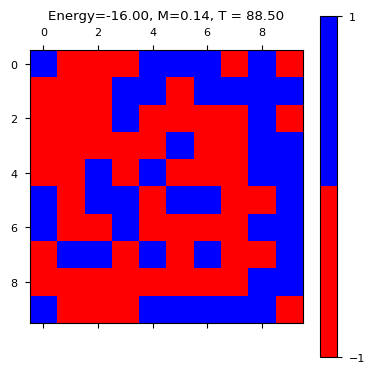

<Figure size 600x600 with 0 Axes>

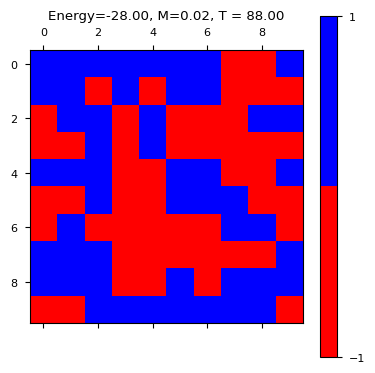

<Figure size 600x600 with 0 Axes>

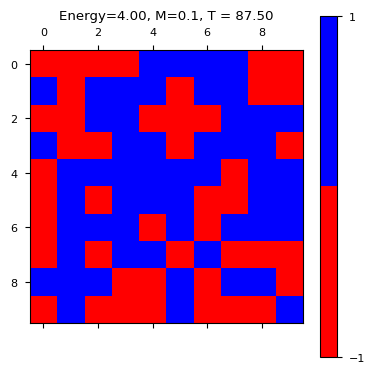

<Figure size 600x600 with 0 Axes>

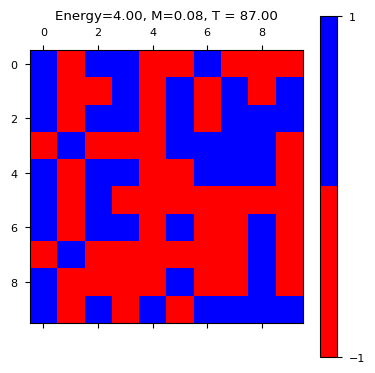

<Figure size 600x600 with 0 Axes>

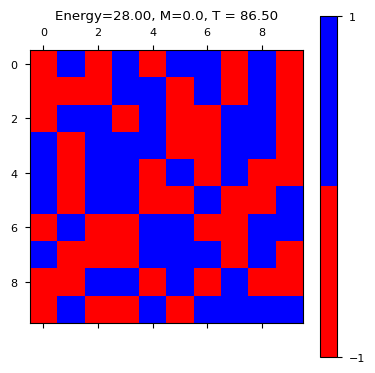

<Figure size 600x600 with 0 Axes>

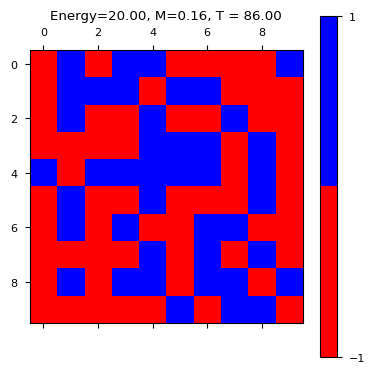

<Figure size 600x600 with 0 Axes>

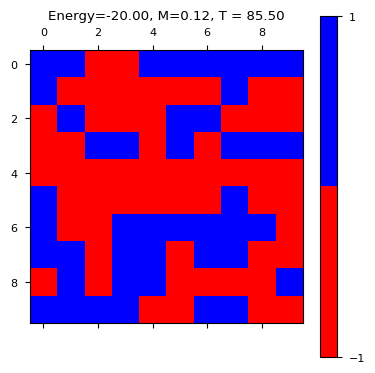

<Figure size 600x600 with 0 Axes>

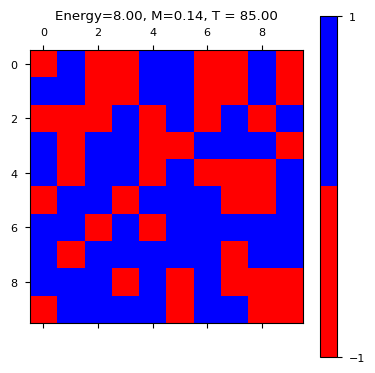

<Figure size 600x600 with 0 Axes>

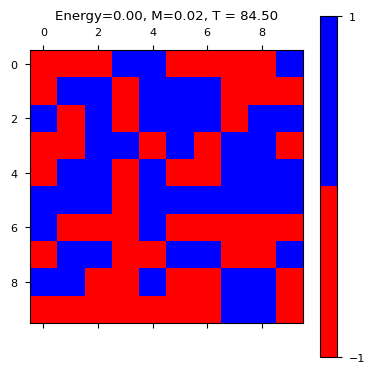

<Figure size 600x600 with 0 Axes>

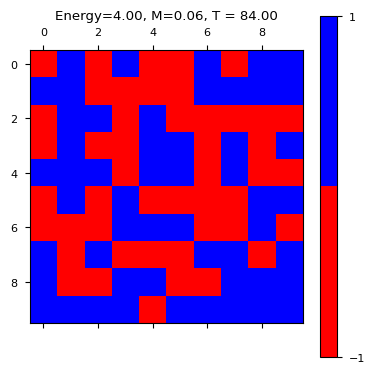

<Figure size 600x600 with 0 Axes>

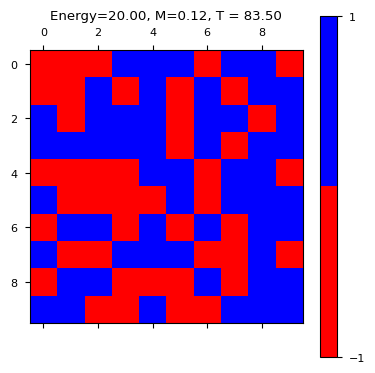

<Figure size 600x600 with 0 Axes>

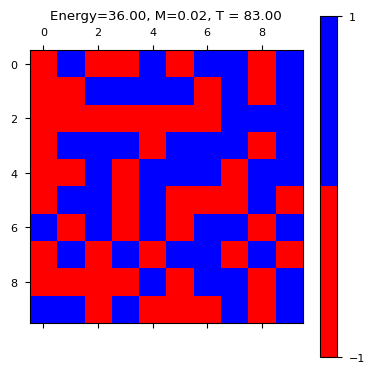

<Figure size 600x600 with 0 Axes>

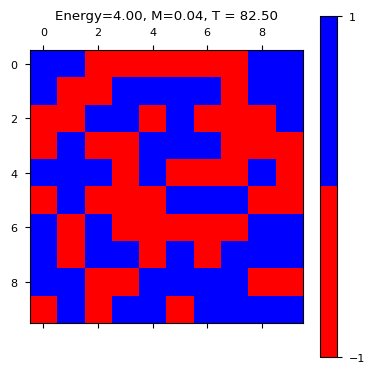

<Figure size 600x600 with 0 Axes>

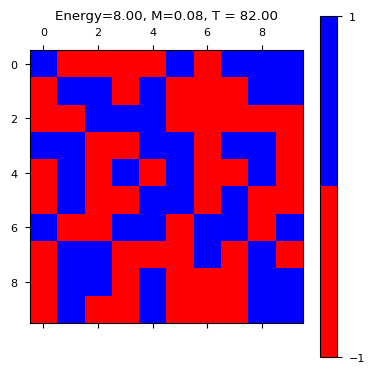

<Figure size 600x600 with 0 Axes>

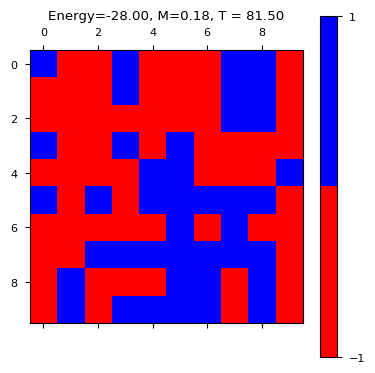

<Figure size 600x600 with 0 Axes>

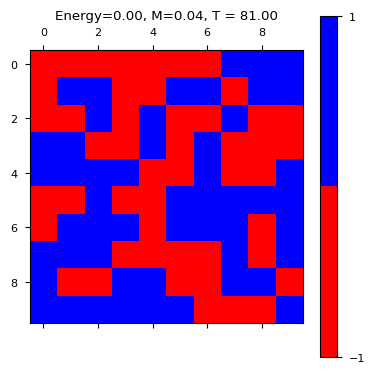

<Figure size 600x600 with 0 Axes>

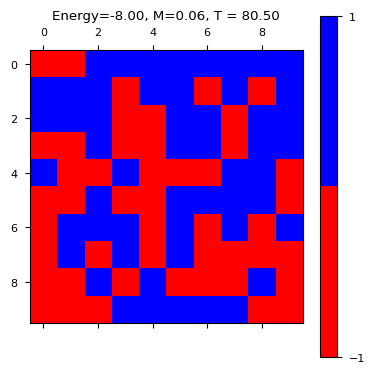

<Figure size 600x600 with 0 Axes>

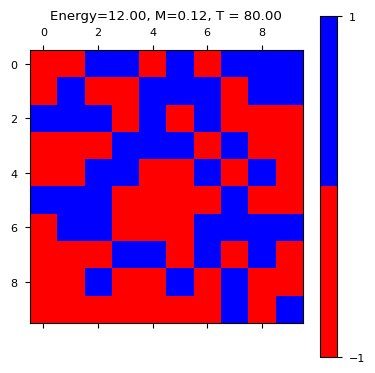

<Figure size 600x600 with 0 Axes>

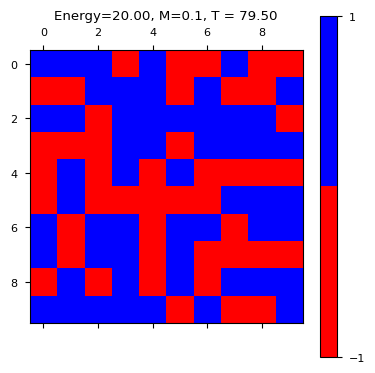

<Figure size 600x600 with 0 Axes>

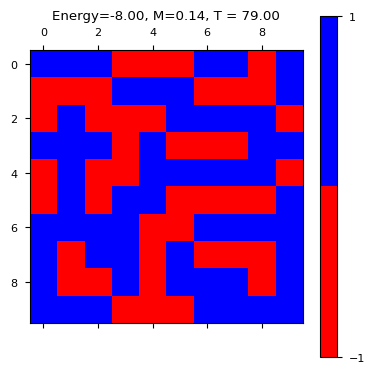

<Figure size 600x600 with 0 Axes>

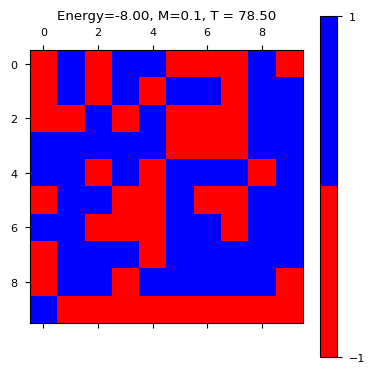

<Figure size 600x600 with 0 Axes>

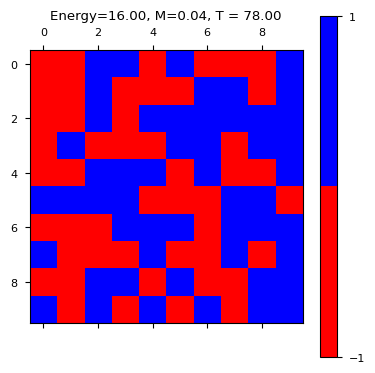

<Figure size 600x600 with 0 Axes>

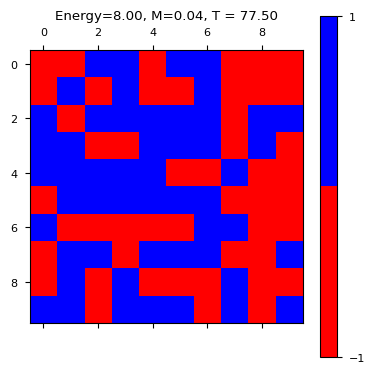

<Figure size 600x600 with 0 Axes>

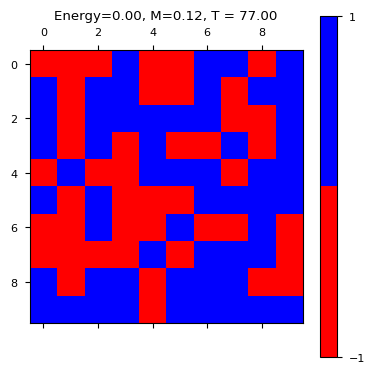

<Figure size 600x600 with 0 Axes>

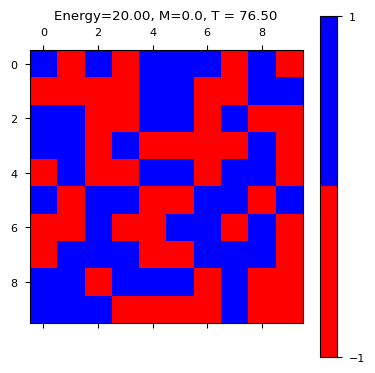

<Figure size 600x600 with 0 Axes>

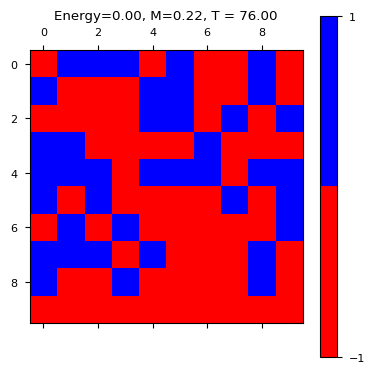

<Figure size 600x600 with 0 Axes>

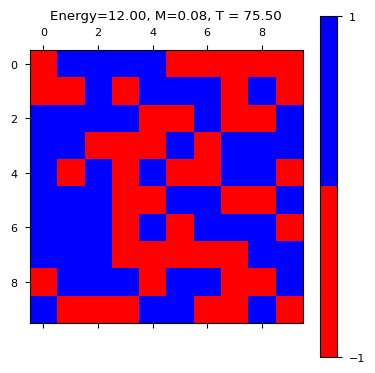

<Figure size 600x600 with 0 Axes>

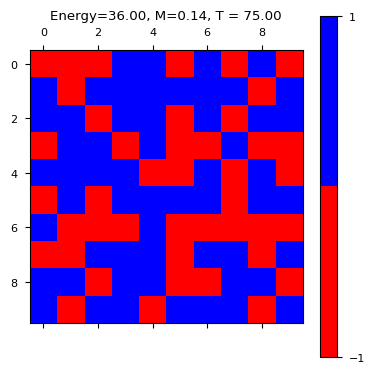

<Figure size 600x600 with 0 Axes>

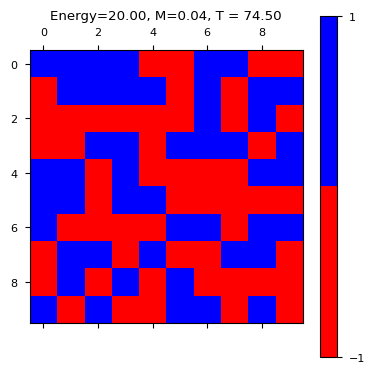

<Figure size 600x600 with 0 Axes>

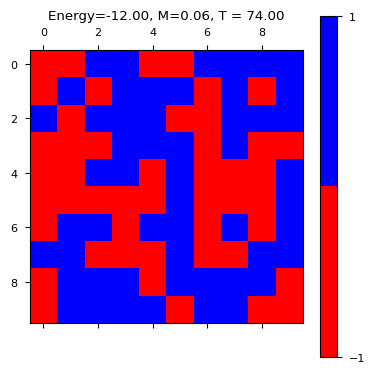

<Figure size 600x600 with 0 Axes>

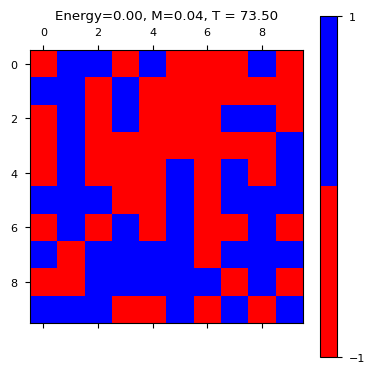

<Figure size 600x600 with 0 Axes>

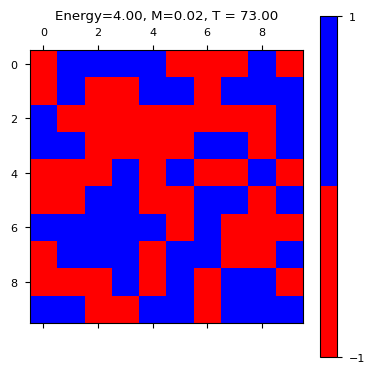

<Figure size 600x600 with 0 Axes>

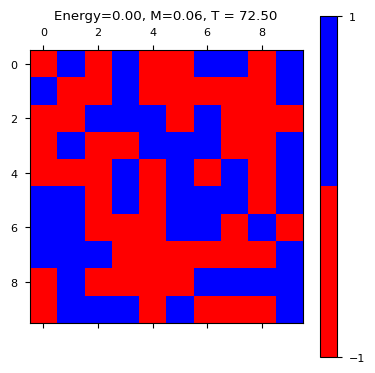

<Figure size 600x600 with 0 Axes>

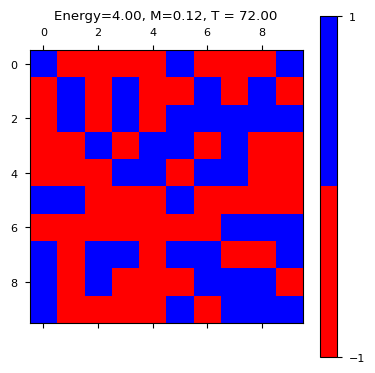

<Figure size 600x600 with 0 Axes>

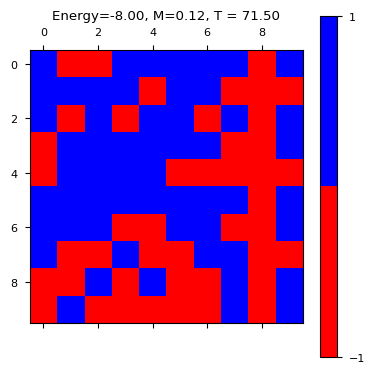

<Figure size 600x600 with 0 Axes>

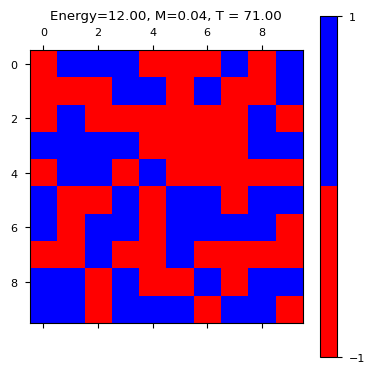

<Figure size 600x600 with 0 Axes>

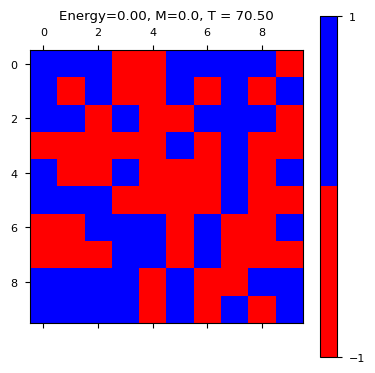

<Figure size 600x600 with 0 Axes>

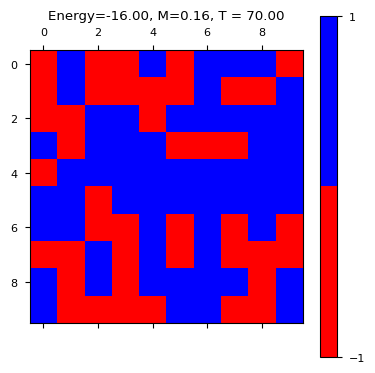

<Figure size 600x600 with 0 Axes>

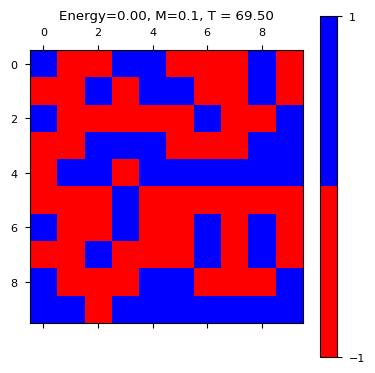

<Figure size 600x600 with 0 Axes>

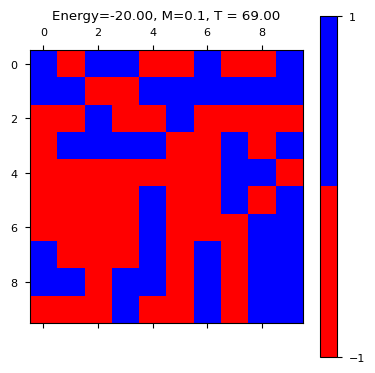

<Figure size 600x600 with 0 Axes>

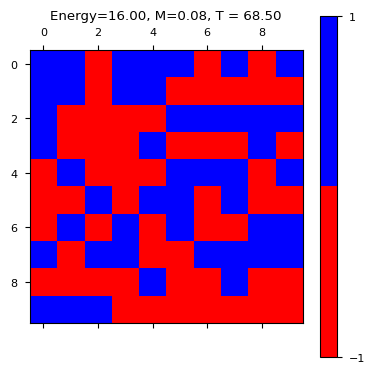

<Figure size 600x600 with 0 Axes>

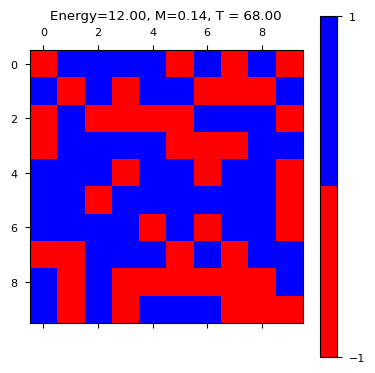

<Figure size 600x600 with 0 Axes>

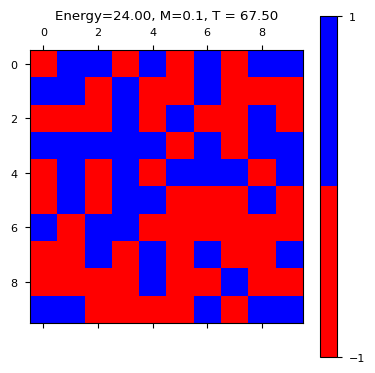

<Figure size 600x600 with 0 Axes>

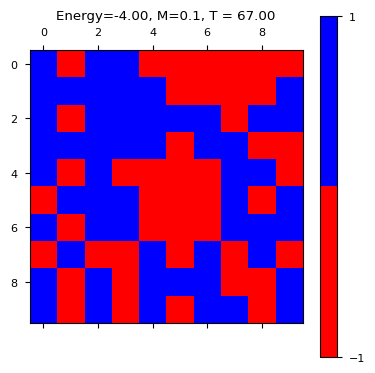

<Figure size 600x600 with 0 Axes>

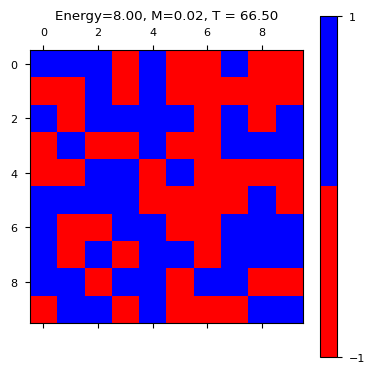

<Figure size 600x600 with 0 Axes>

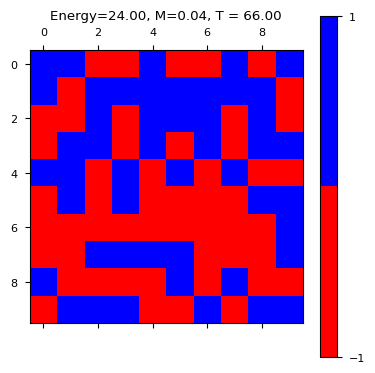

<Figure size 600x600 with 0 Axes>

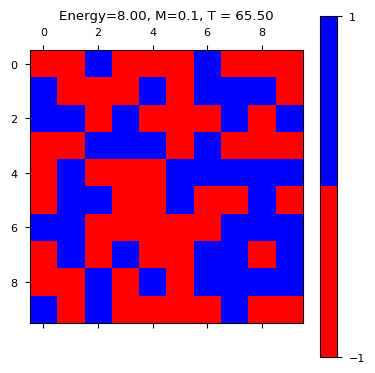

<Figure size 600x600 with 0 Axes>

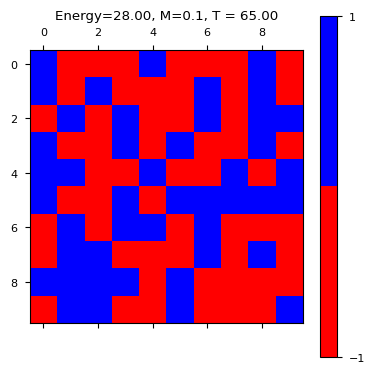

<Figure size 600x600 with 0 Axes>

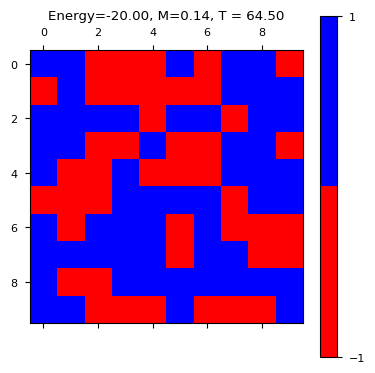

<Figure size 600x600 with 0 Axes>

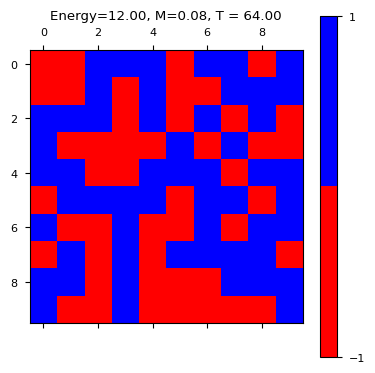

<Figure size 600x600 with 0 Axes>

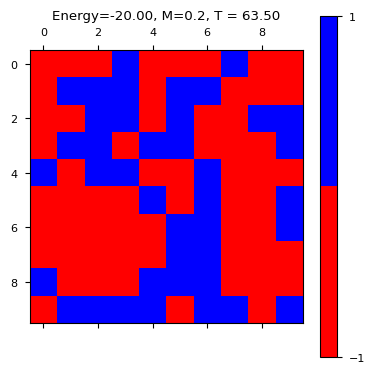

<Figure size 600x600 with 0 Axes>

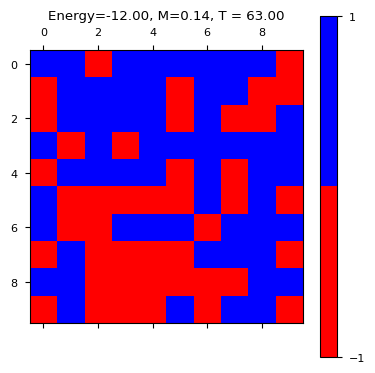

<Figure size 600x600 with 0 Axes>

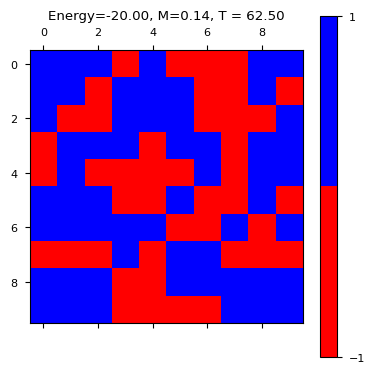

<Figure size 600x600 with 0 Axes>

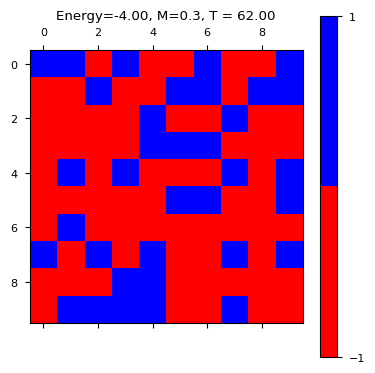

<Figure size 600x600 with 0 Axes>

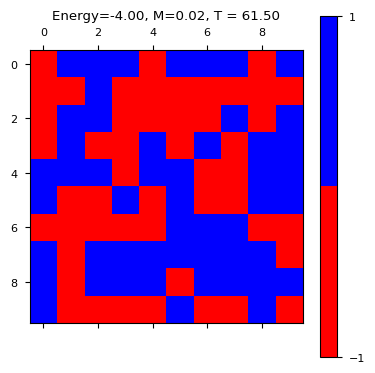

<Figure size 600x600 with 0 Axes>

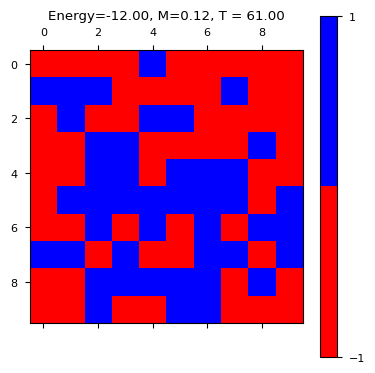

<Figure size 600x600 with 0 Axes>

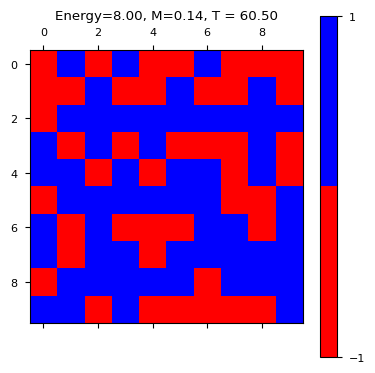

<Figure size 600x600 with 0 Axes>

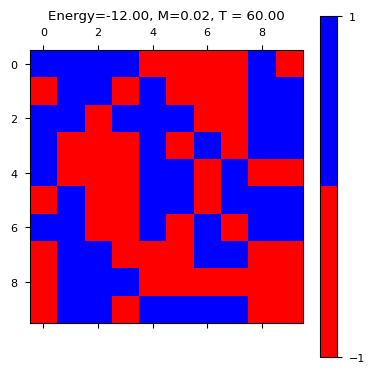

<Figure size 600x600 with 0 Axes>

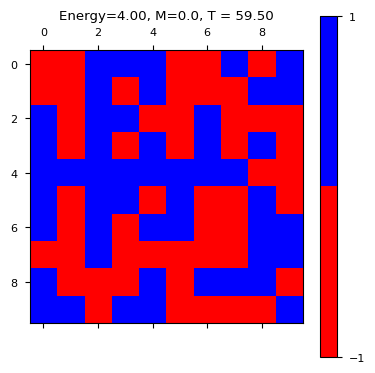

<Figure size 600x600 with 0 Axes>

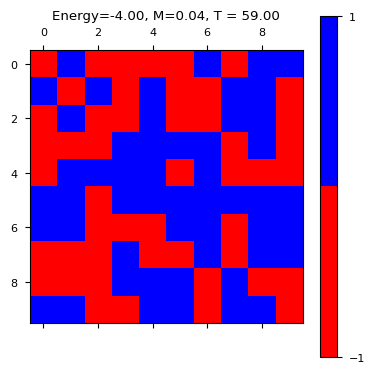

<Figure size 600x600 with 0 Axes>

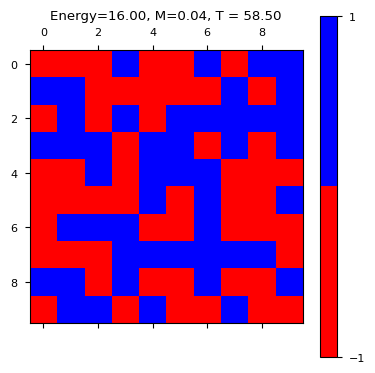

<Figure size 600x600 with 0 Axes>

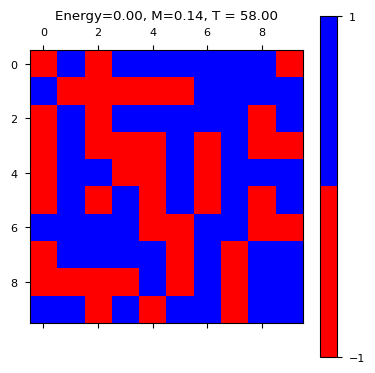

<Figure size 600x600 with 0 Axes>

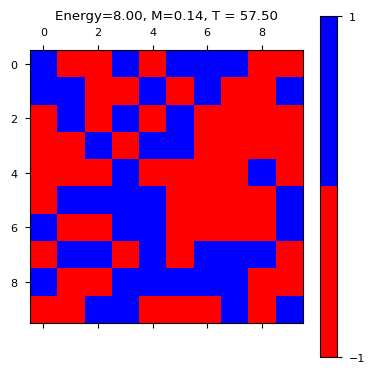

<Figure size 600x600 with 0 Axes>

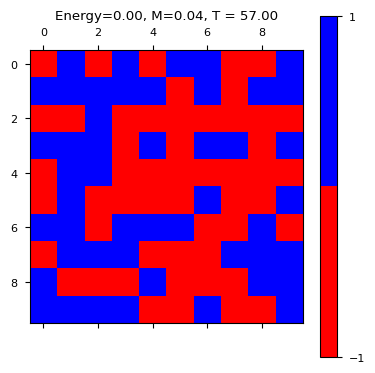

<Figure size 600x600 with 0 Axes>

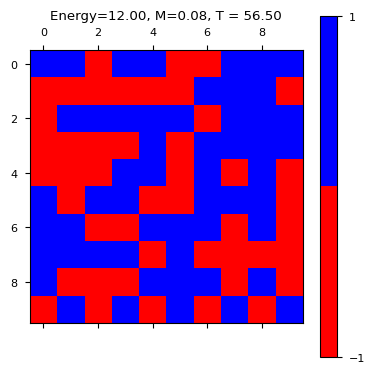

<Figure size 600x600 with 0 Axes>

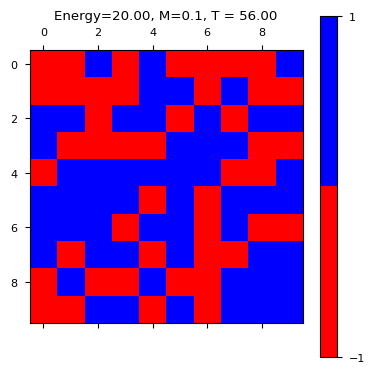

<Figure size 600x600 with 0 Axes>

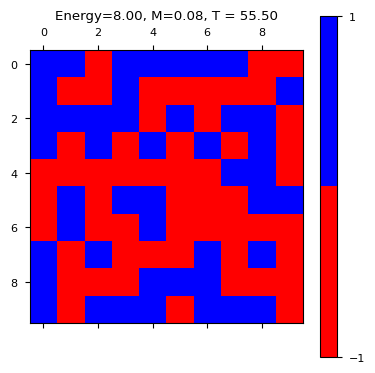

<Figure size 600x600 with 0 Axes>

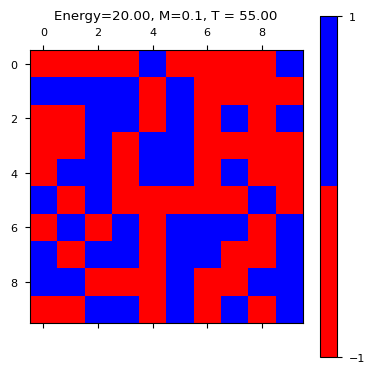

<Figure size 600x600 with 0 Axes>

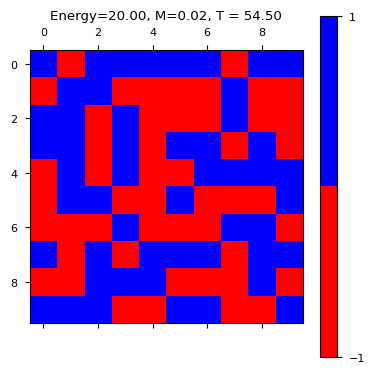

<Figure size 600x600 with 0 Axes>

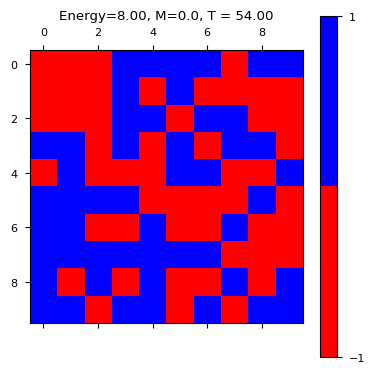

<Figure size 600x600 with 0 Axes>

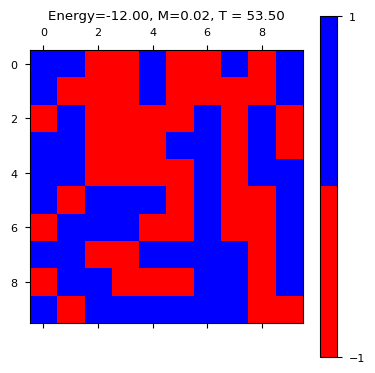

<Figure size 600x600 with 0 Axes>

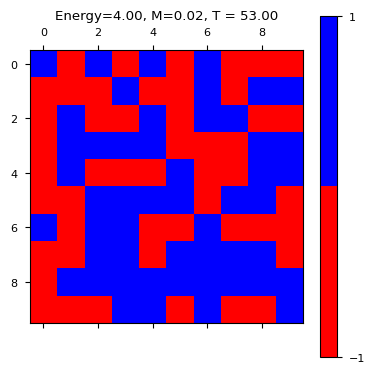

<Figure size 600x600 with 0 Axes>

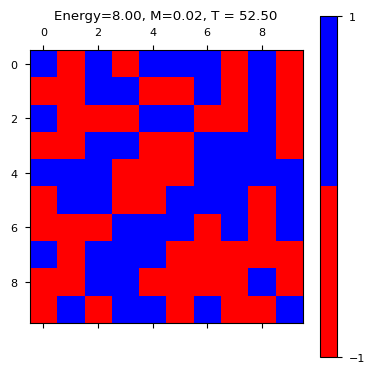

<Figure size 600x600 with 0 Axes>

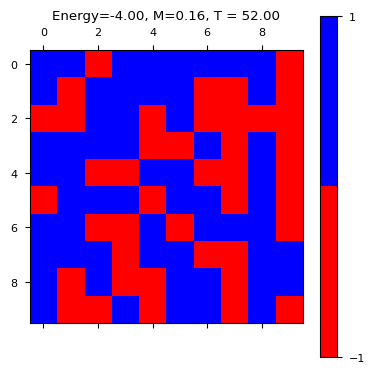

<Figure size 600x600 with 0 Axes>

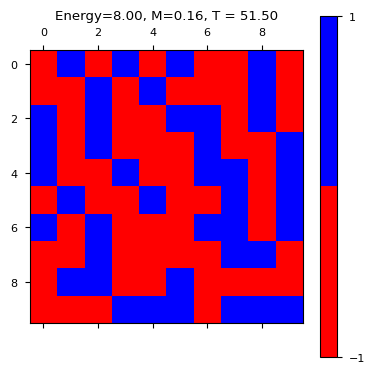

<Figure size 600x600 with 0 Axes>

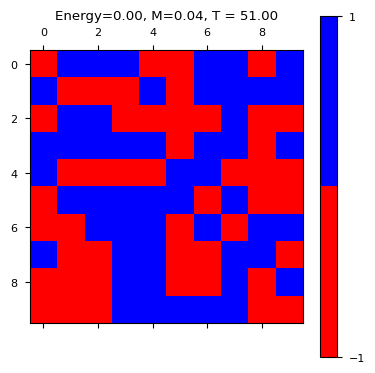

<Figure size 600x600 with 0 Axes>

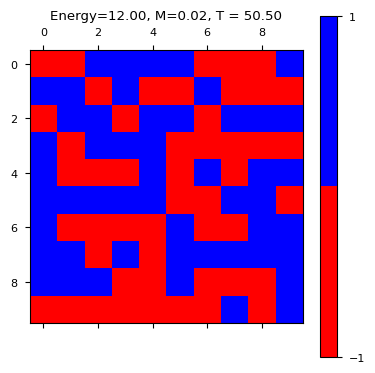

<Figure size 600x600 with 0 Axes>

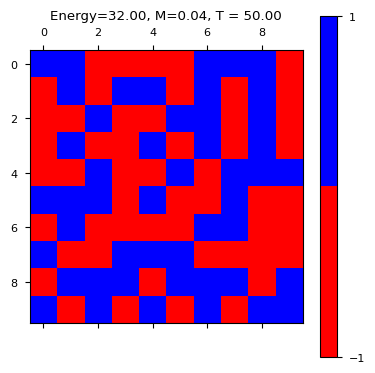

<Figure size 600x600 with 0 Axes>

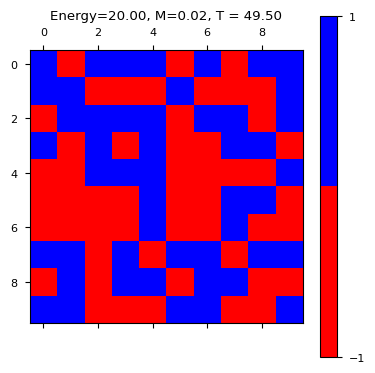

<Figure size 600x600 with 0 Axes>

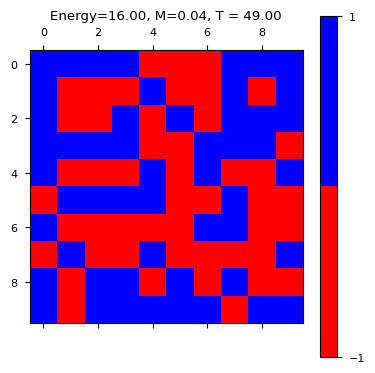

<Figure size 600x600 with 0 Axes>

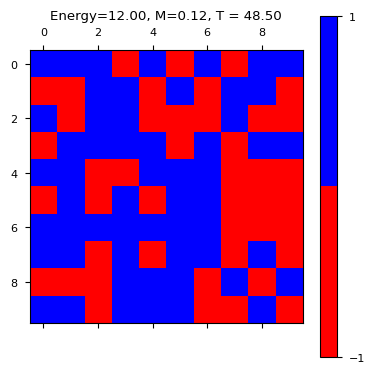

<Figure size 600x600 with 0 Axes>

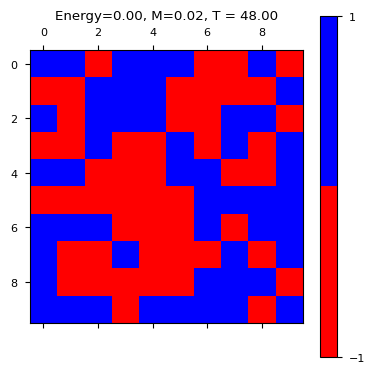

<Figure size 600x600 with 0 Axes>

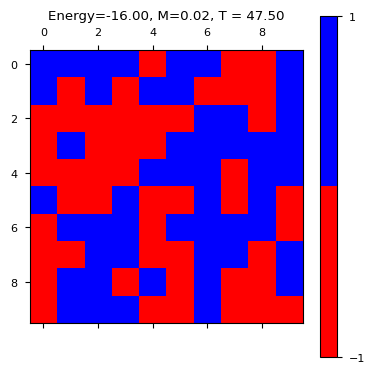

<Figure size 600x600 with 0 Axes>

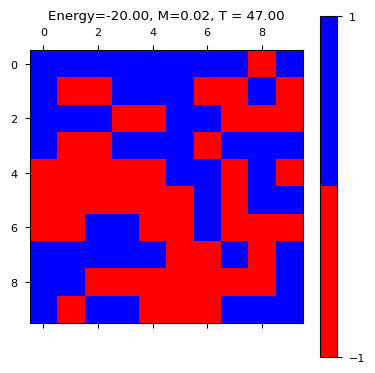

<Figure size 600x600 with 0 Axes>

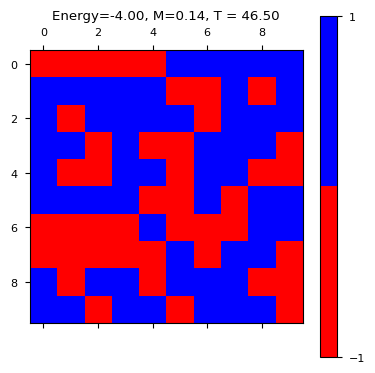

<Figure size 600x600 with 0 Axes>

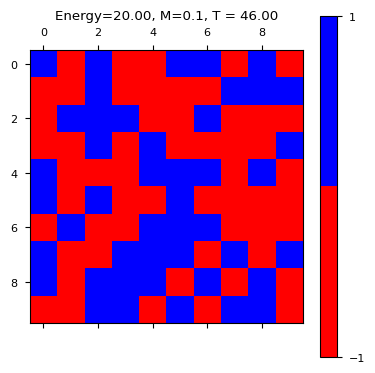

<Figure size 600x600 with 0 Axes>

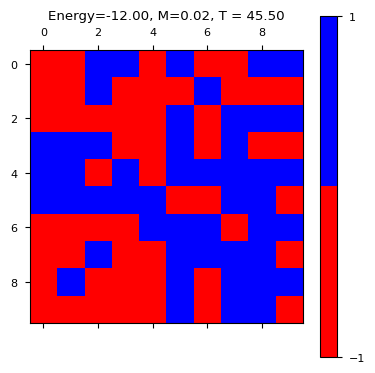

<Figure size 600x600 with 0 Axes>

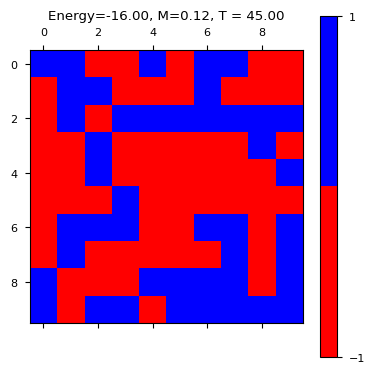

<Figure size 600x600 with 0 Axes>

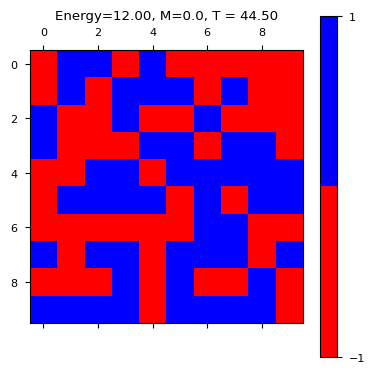

<Figure size 600x600 with 0 Axes>

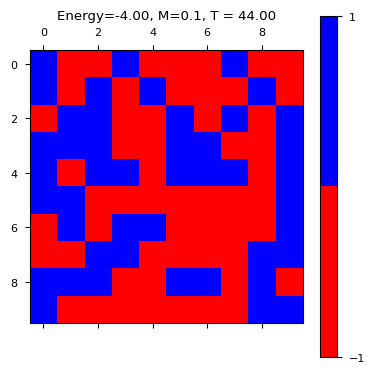

<Figure size 600x600 with 0 Axes>

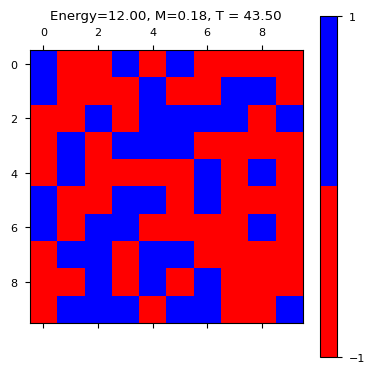

<Figure size 600x600 with 0 Axes>

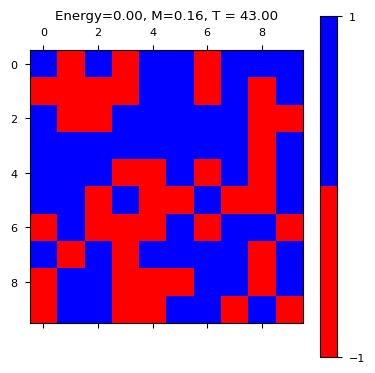

<Figure size 600x600 with 0 Axes>

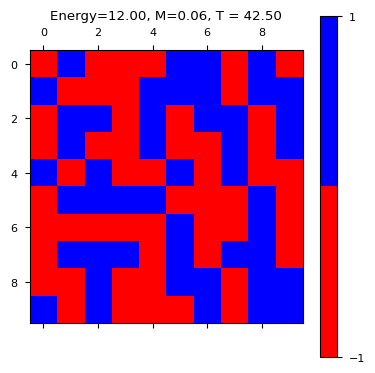

<Figure size 600x600 with 0 Axes>

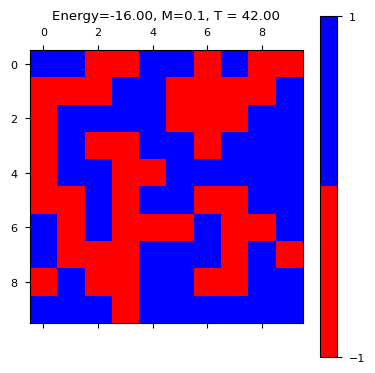

<Figure size 600x600 with 0 Axes>

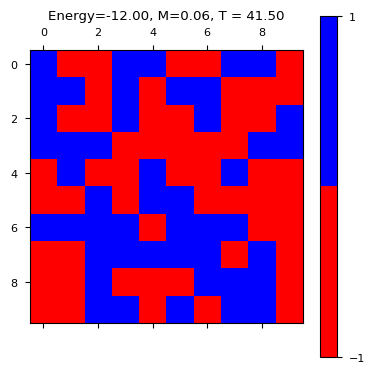

<Figure size 600x600 with 0 Axes>

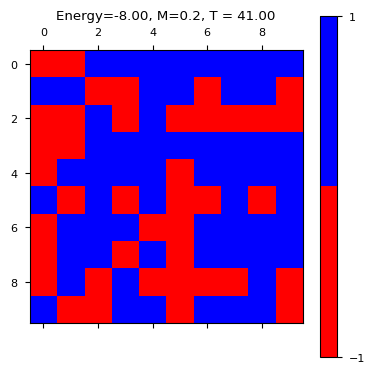

<Figure size 600x600 with 0 Axes>

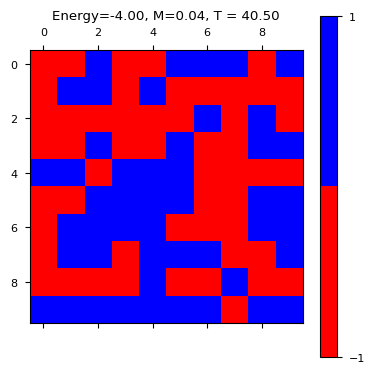

<Figure size 600x600 with 0 Axes>

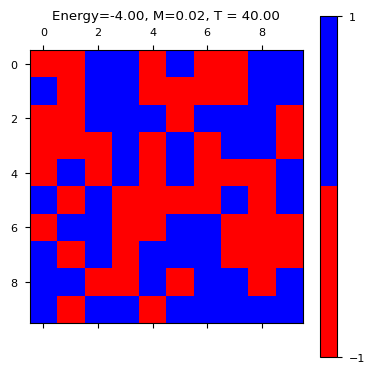

<Figure size 600x600 with 0 Axes>

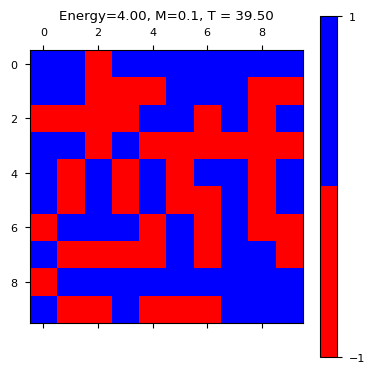

<Figure size 600x600 with 0 Axes>

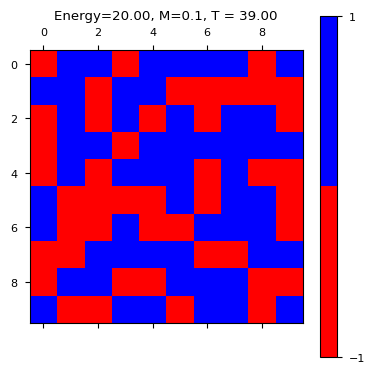

<Figure size 600x600 with 0 Axes>

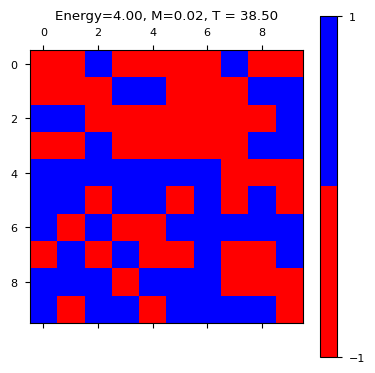

<Figure size 600x600 with 0 Axes>

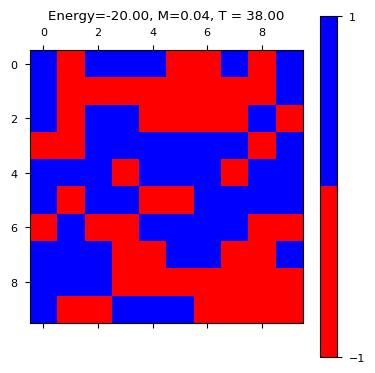

<Figure size 600x600 with 0 Axes>

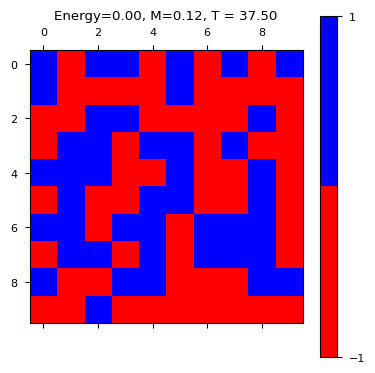

<Figure size 600x600 with 0 Axes>

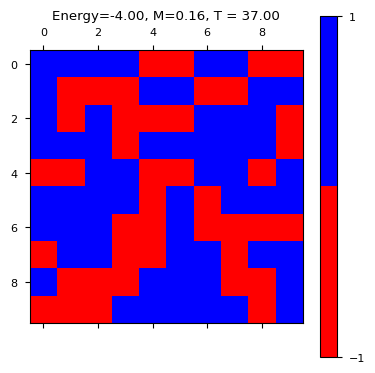

<Figure size 600x600 with 0 Axes>

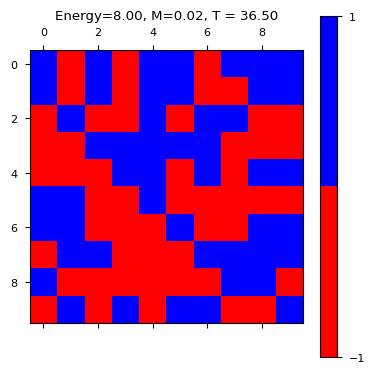

<Figure size 600x600 with 0 Axes>

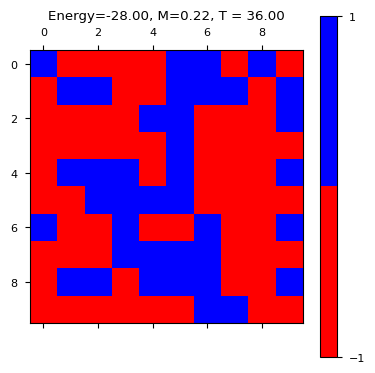

<Figure size 600x600 with 0 Axes>

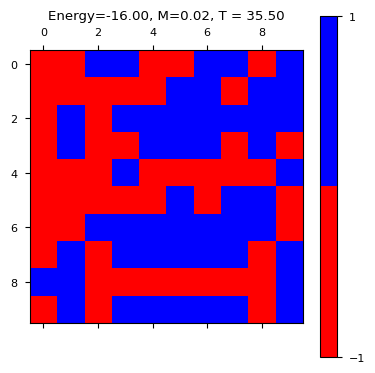

<Figure size 600x600 with 0 Axes>

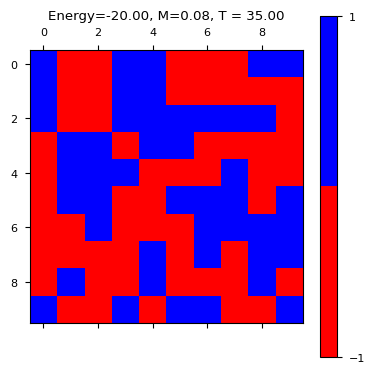

<Figure size 600x600 with 0 Axes>

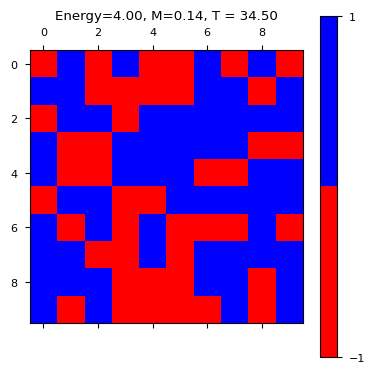

<Figure size 600x600 with 0 Axes>

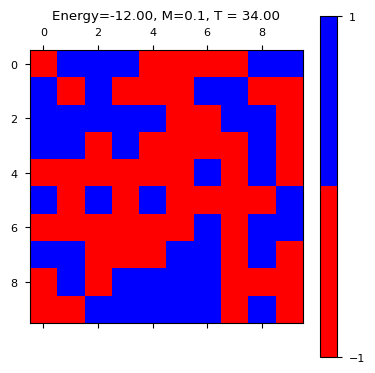

<Figure size 600x600 with 0 Axes>

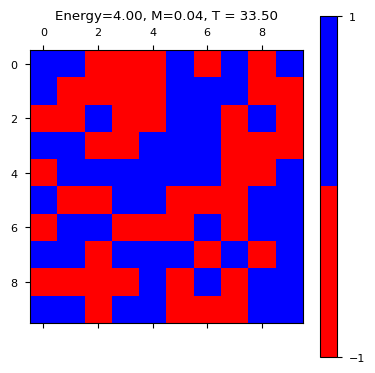

<Figure size 600x600 with 0 Axes>

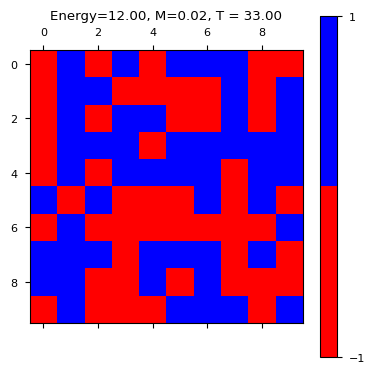

<Figure size 600x600 with 0 Axes>

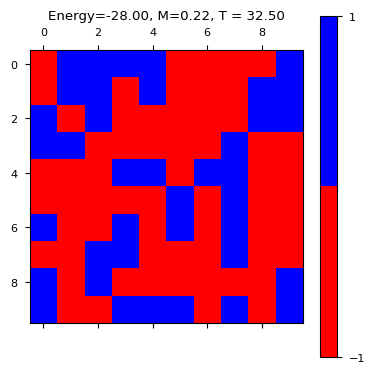

<Figure size 600x600 with 0 Axes>

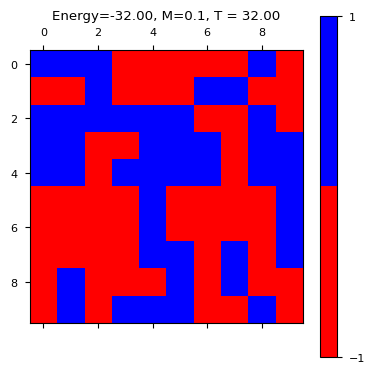

<Figure size 600x600 with 0 Axes>

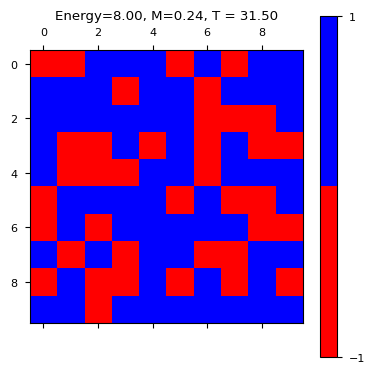

<Figure size 600x600 with 0 Axes>

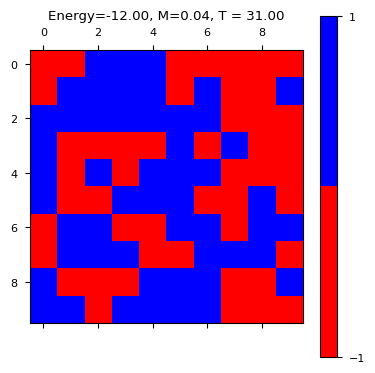

<Figure size 600x600 with 0 Axes>

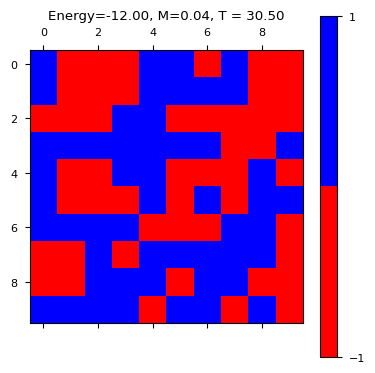

<Figure size 600x600 with 0 Axes>

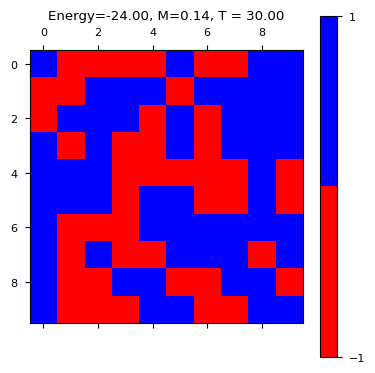

<Figure size 600x600 with 0 Axes>

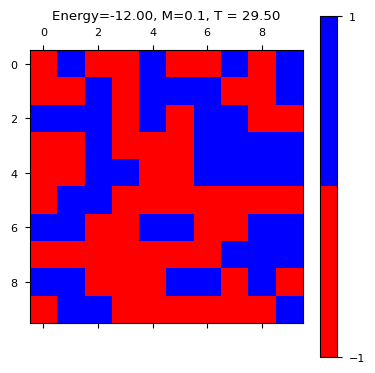

<Figure size 600x600 with 0 Axes>

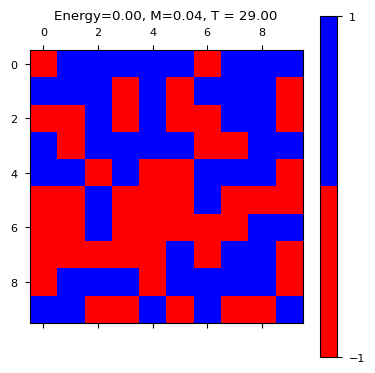

<Figure size 600x600 with 0 Axes>

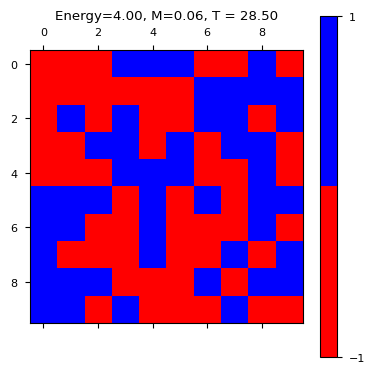

<Figure size 600x600 with 0 Axes>

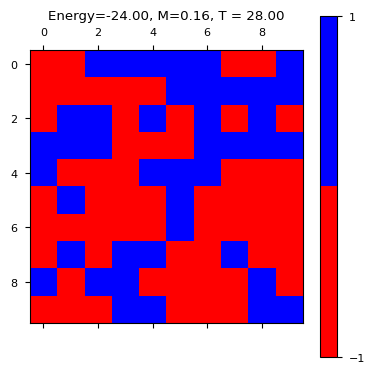

<Figure size 600x600 with 0 Axes>

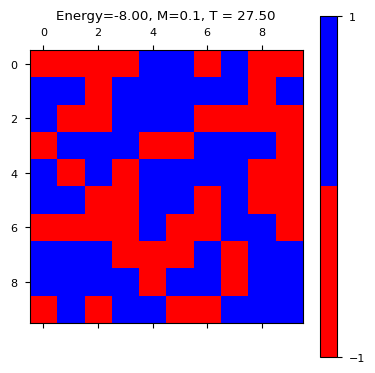

<Figure size 600x600 with 0 Axes>

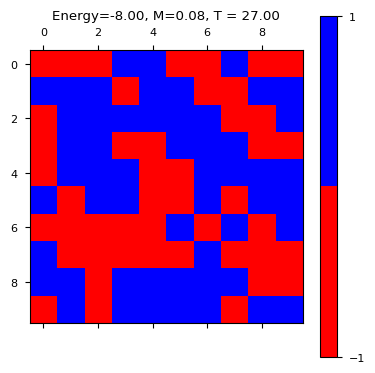

<Figure size 600x600 with 0 Axes>

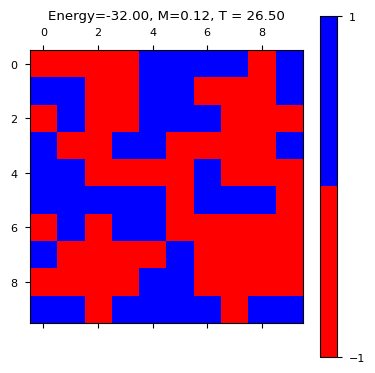

<Figure size 600x600 with 0 Axes>

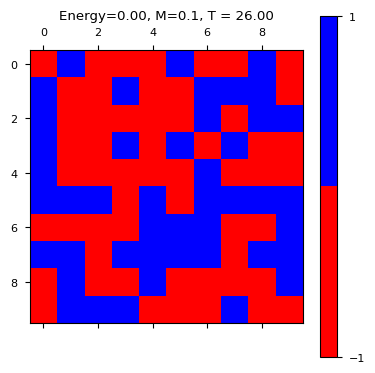

<Figure size 600x600 with 0 Axes>

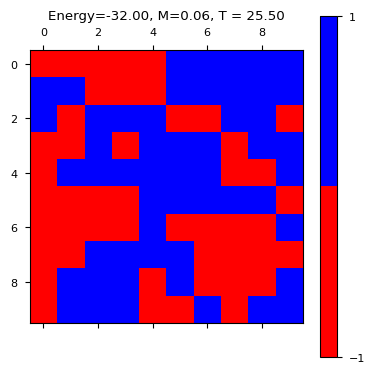

<Figure size 600x600 with 0 Axes>

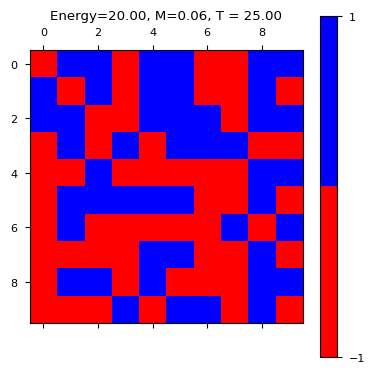

<Figure size 600x600 with 0 Axes>

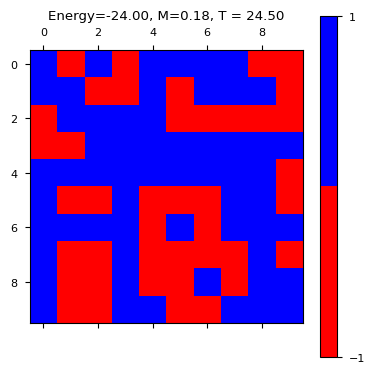

<Figure size 600x600 with 0 Axes>

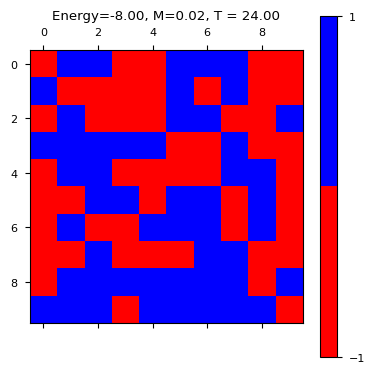

<Figure size 600x600 with 0 Axes>

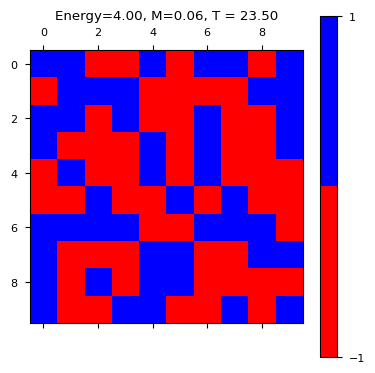

<Figure size 600x600 with 0 Axes>

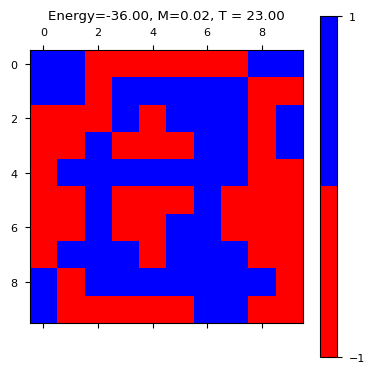

<Figure size 600x600 with 0 Axes>

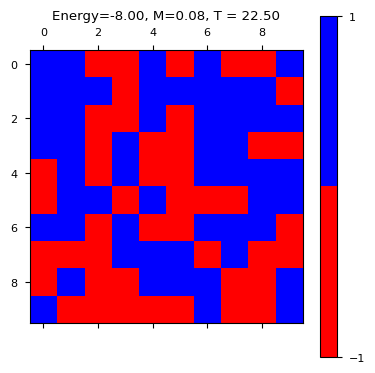

<Figure size 600x600 with 0 Axes>

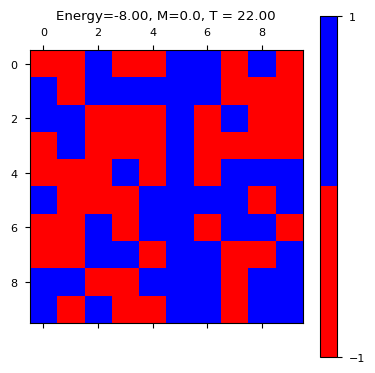

<Figure size 600x600 with 0 Axes>

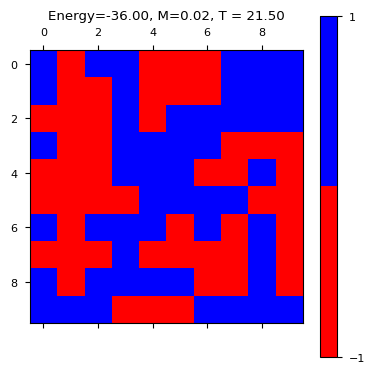

<Figure size 600x600 with 0 Axes>

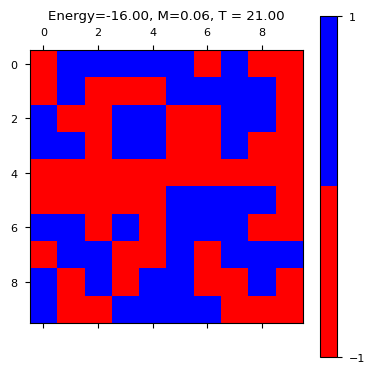

<Figure size 600x600 with 0 Axes>

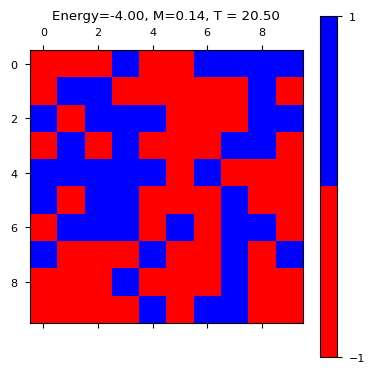

<Figure size 600x600 with 0 Axes>

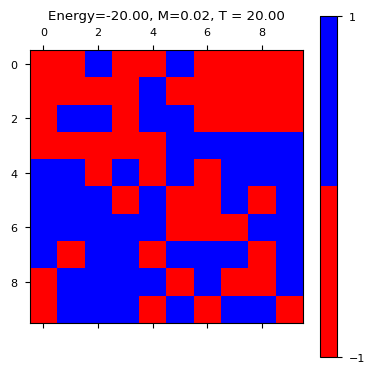

<Figure size 600x600 with 0 Axes>

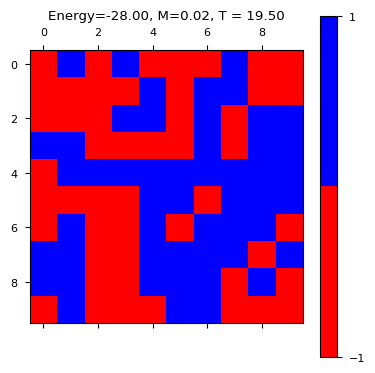

<Figure size 600x600 with 0 Axes>

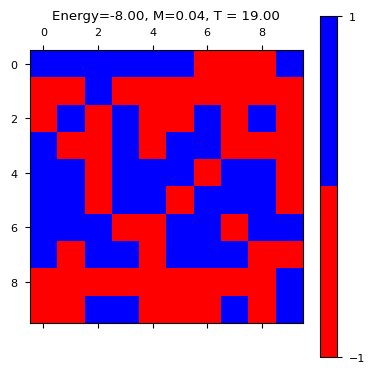

<Figure size 600x600 with 0 Axes>

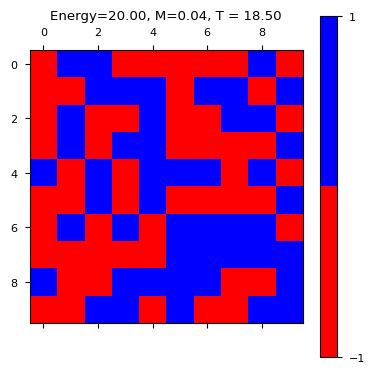

<Figure size 600x600 with 0 Axes>

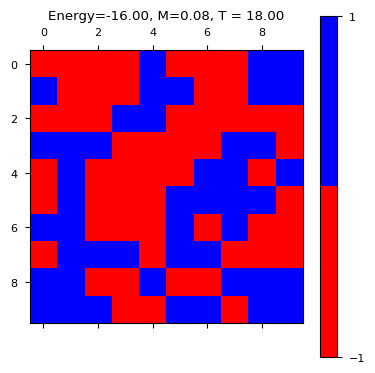

<Figure size 600x600 with 0 Axes>

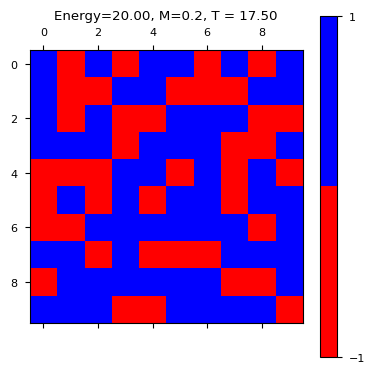

<Figure size 600x600 with 0 Axes>

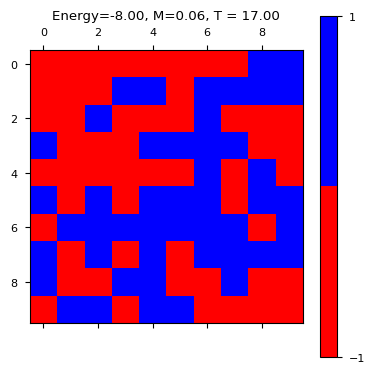

<Figure size 600x600 with 0 Axes>

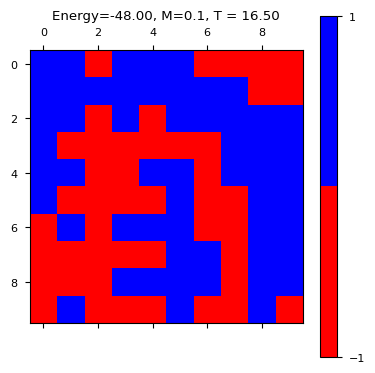

<Figure size 600x600 with 0 Axes>

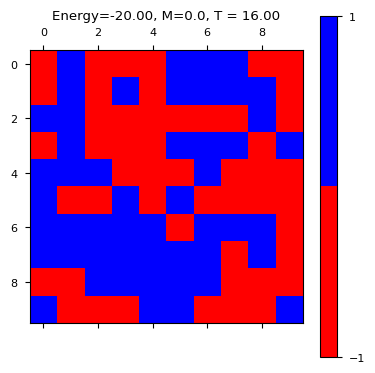

<Figure size 600x600 with 0 Axes>

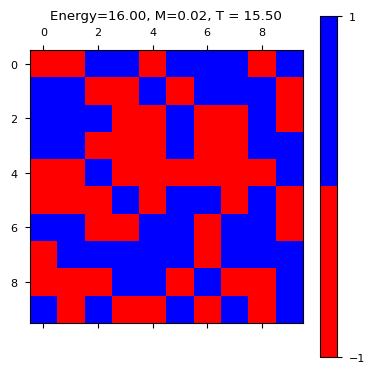

<Figure size 600x600 with 0 Axes>

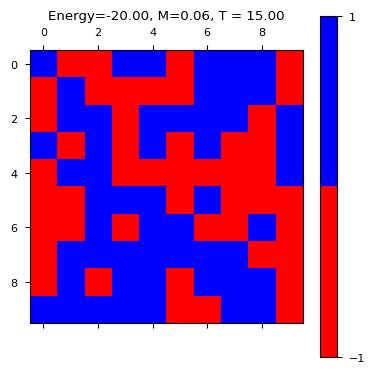

<Figure size 600x600 with 0 Axes>

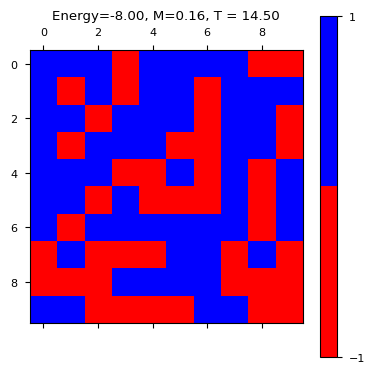

<Figure size 600x600 with 0 Axes>

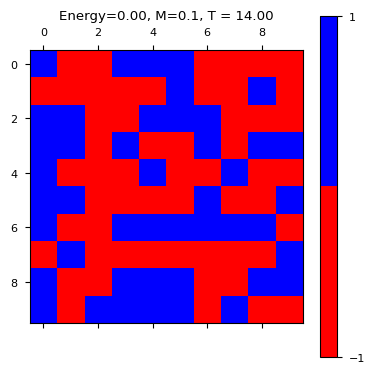

<Figure size 600x600 with 0 Axes>

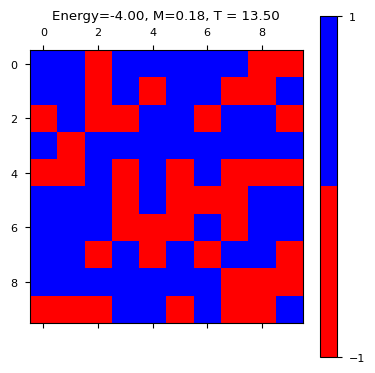

<Figure size 600x600 with 0 Axes>

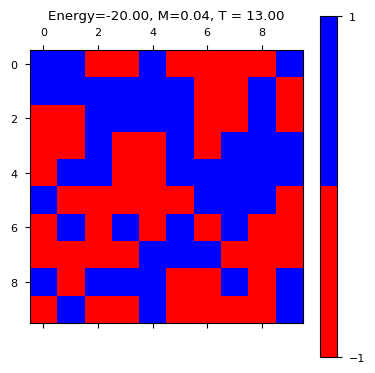

<Figure size 600x600 with 0 Axes>

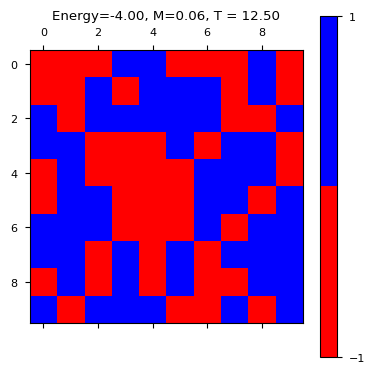

<Figure size 600x600 with 0 Axes>

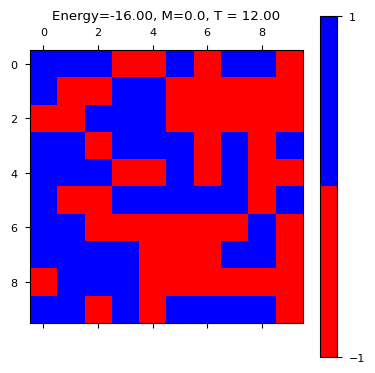

<Figure size 600x600 with 0 Axes>

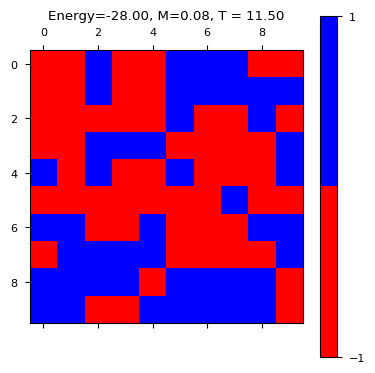

<Figure size 600x600 with 0 Axes>

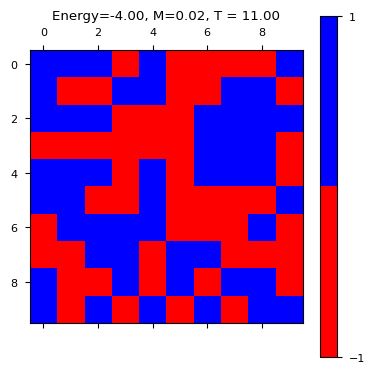

<Figure size 600x600 with 0 Axes>

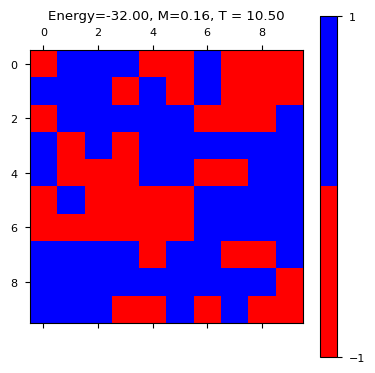

<Figure size 600x600 with 0 Axes>

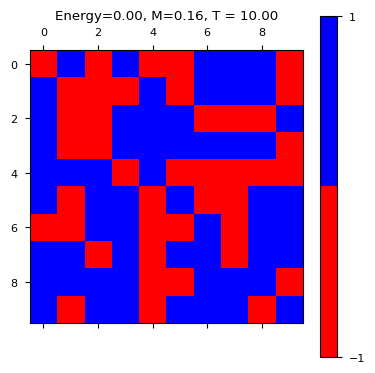

<Figure size 600x600 with 0 Axes>

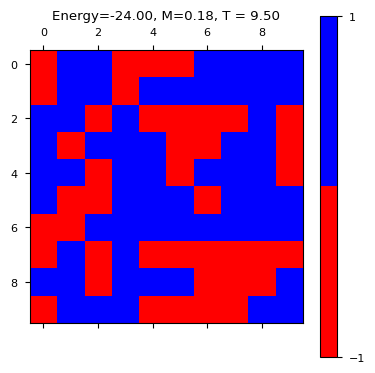

<Figure size 600x600 with 0 Axes>

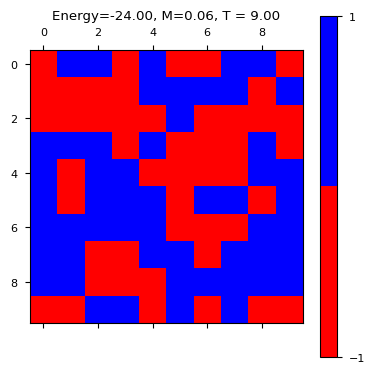

<Figure size 600x600 with 0 Axes>

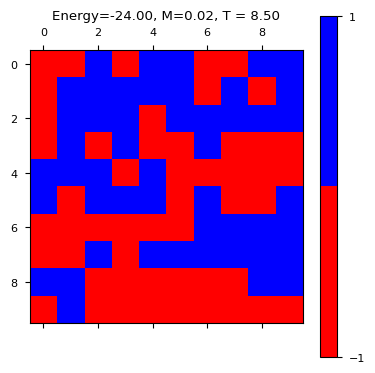

<Figure size 600x600 with 0 Axes>

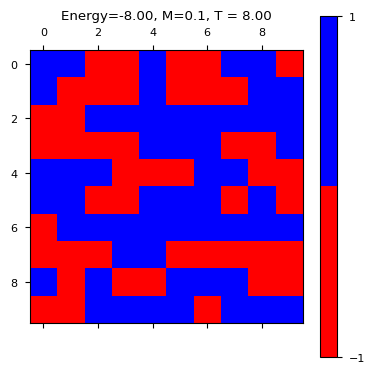

<Figure size 600x600 with 0 Axes>

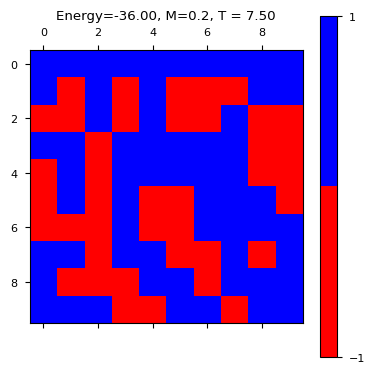

<Figure size 600x600 with 0 Axes>

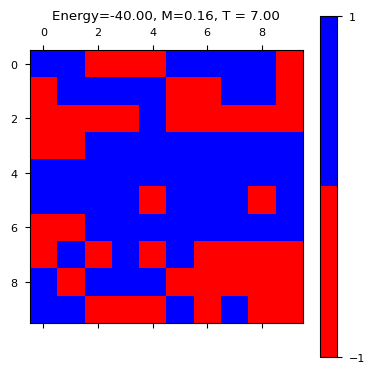

<Figure size 600x600 with 0 Axes>

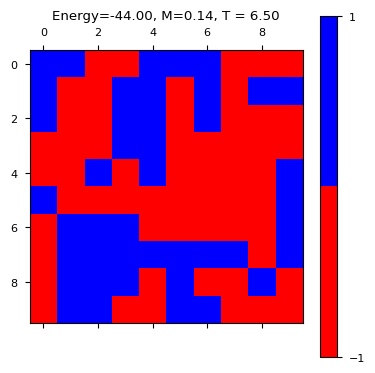

<Figure size 600x600 with 0 Axes>

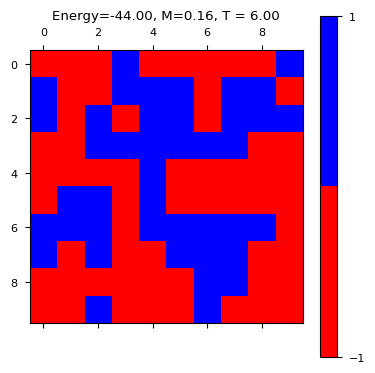

<Figure size 600x600 with 0 Axes>

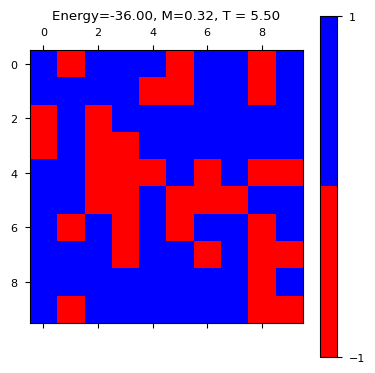

<Figure size 600x600 with 0 Axes>

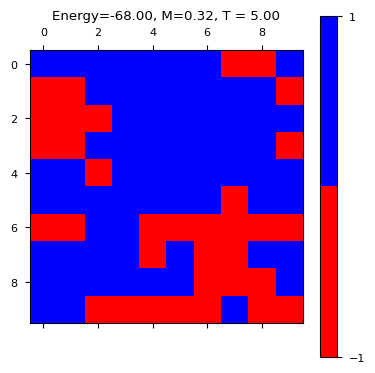

<Figure size 600x600 with 0 Axes>

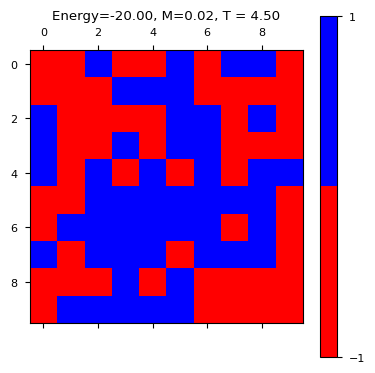

<Figure size 600x600 with 0 Axes>

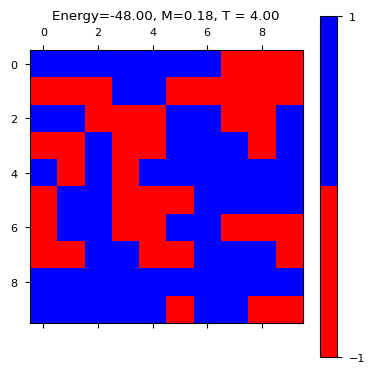

<Figure size 600x600 with 0 Axes>

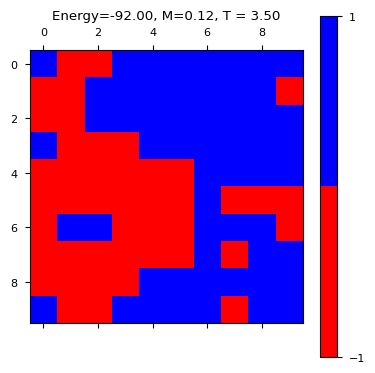

<Figure size 600x600 with 0 Axes>

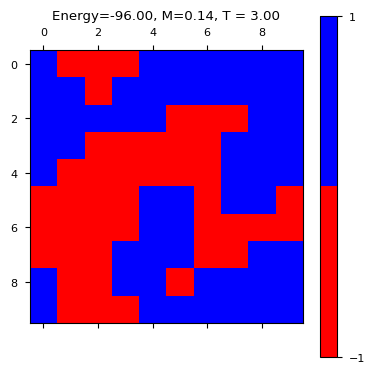

<Figure size 600x600 with 0 Axes>

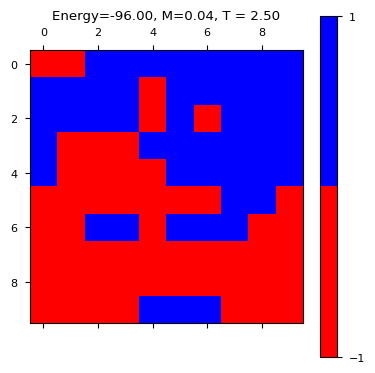

<Figure size 600x600 with 0 Axes>

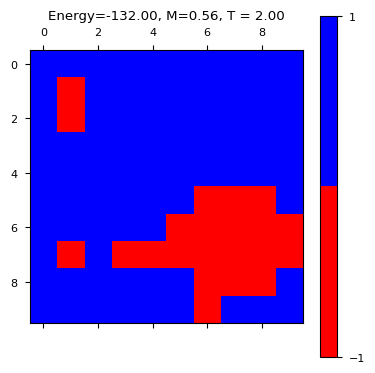

<Figure size 600x600 with 0 Axes>

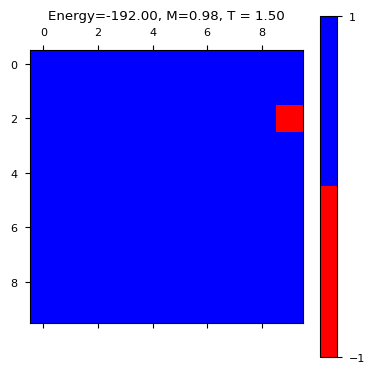

<Figure size 600x600 with 0 Axes>

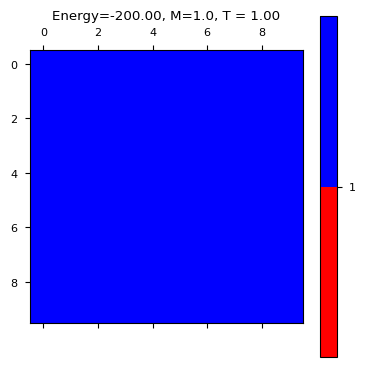

<Figure size 600x600 with 0 Axes>

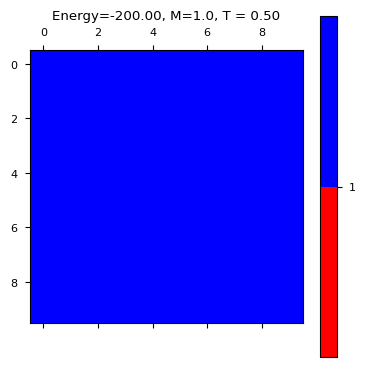

In [ ]:
T = np.arange(100, 0.1, -0.1)
net= np.random.choice([-1, 1], size = (10, 10))#initial network
m = []
k = 0
for t in T:
  I = IsingModel(net, [-1, 1], 1, t)
  if k % 5 == 0:
    I.MCstep(300, 200, True)#i will display the result after changing temp
    k += 1
  else:
    I.MCstep(200, 200, False)
    k += 1
  m.append(I.m_avg)
  net = I.net_
#as expected

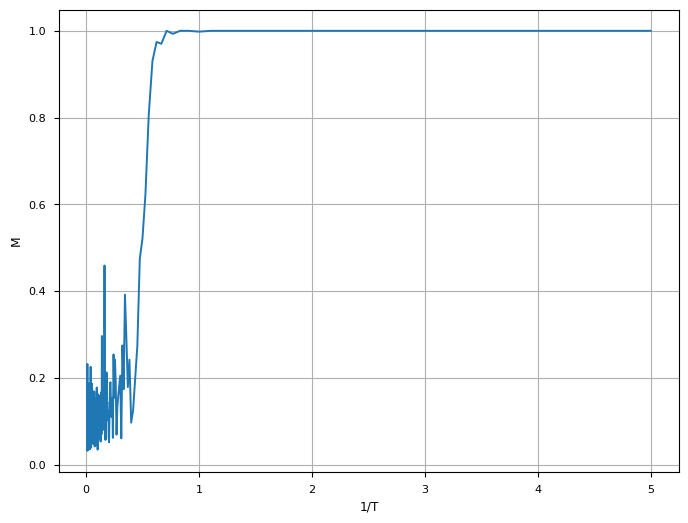

In [ ]:
#now lets plot average M vs 1/T
plt.figure(figsize=(8, 6))
plt.xlabel('1/T')
plt.ylabel('M')
sns.lineplot(x= 1/T, y= m)
plt.grid(True)
plt.show()
#as expected in low tempreture all spins are in the same direction!so total magnetization is 1 as expected

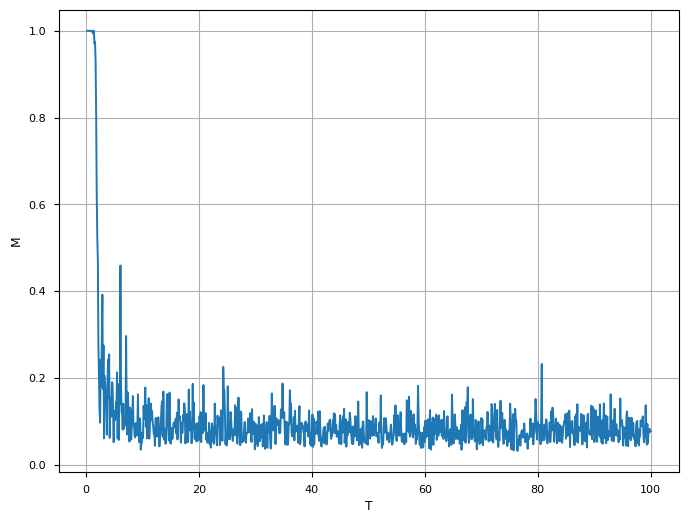

In [ ]:
plt.figure(figsize=(8, 6))
plt.xlabel('T')
plt.ylabel('M')
sns.lineplot(x= T, y= m)
plt.grid(True)
plt.show()

# **3.Calculation of some physical properties using 2D ising model**

In [ ]:
#lets do step by step as mentioned in the text
from sklearn.linear_model import LinearRegression
class IsingModel:

  def __init__(self, netsize, available_spins, J, T):
    '''
    in this function i just create, network and save some of the related parameters such as T and J
    '''
    if isinstance(netsize, int):
      self.L_ = netsize
      self.net_ = np.random.choice(available_spins, size = (netsize, netsize))
    else:
      self.L_ = netsize.shape[0]
      self.net_ = netsize.copy()
    self.T_ = T
    self.spins_ = available_spins
    self.j_ = J
    self.J_ = J / (T)#i put k_b = 1
    delta_E = np.array([-8, -4, 0, 4, 8])
    self.values_ = {i : np.exp(-i * self.J_) for i in delta_E}
    self.magnetization_history = []
    self.energy_history = []




  def energy(self):
    '''
    here i calculate E for given network structure with periodic boundry condition,
    for summing all the intractions i used the same logic we used in coloring algorithm
    for counting each intraction exactly once.this is more efficient than summing
    all four neighbors and divide the result by 2.
    '''
    L = self.net_.shape[0]
    E = 0

    for i in range(L):
      for j in range(L):
        E += (self.net_[(i+1) % L, j] + self.net_[i, (j+1) % L]) * self.net_[i, j]

    return -self.j_ * E



  def delta_E(self, i, j):
    '''
    here i calculate delta E
    '''
    #i, j = np.random.randint(0, self.net_.shape[0], size = 2)
    delta = 2* self.net_[i, j] * (self.net_[(i + 1) % self.L_, j] + self.net_[(i - 1) % self.L_, j] + self.net_[i, (j + 1) % self.L_] + self.net_[i, (j - 1) % self.L_] )

    return delta


  def MCstep(self, N, s, want_visual):
    '''
    here i perform Monte Carlo step N times and i display changes in system at each
    s steps.
    '''
    if want_visual:
      plt.figure(figsize=(6,6))
    corr_l= []
    for n in range(N):
      i , j = np.random.randint(0, self.net_.shape[0], size = 2)
      dE = self.delta_E(i, j)

      if dE <= 0 or np.random.rand() < self.values_[dE]:
        self.net_[i, j] *= -1
        self.energy_history.append(self.energy())#add this for saving energy history
        self.magnetization_history.append(np.abs( np.mean( self.net_)))
        corr_l.append(self.corr_len())


      if want_visual:
        if (n+1) % s == 0 :
          plt.clf()
          cmap = colors.ListedColormap(['red', 'blue'])
          plt.matshow(self.net_, cmap=cmap)
          plt.title(f'Energy={self.energy():.2f}, M={self.magnetization_history[-1]}, T = {self.T_:.2f}')
          plt.colorbar(ticks=[-1, 1])
          plt.pause(0.01)
          plt.show()

    self.m_avg = np.mean(self.magnetization_history)
    if len(corr_l) > 0:
      self.corr_len_avg = np.mean(corr_l)
    else:
      self.corr_len_avg = 0


  def corr_len(self):
    '''
    in this method i will calculate correlation length, using formula disscused in the text
    '''
    N = self.net_.shape[0]
    sigma = np.var(self.net_)
    if sigma < 0.5:
      return 0

    log_c = []
    L = []
    for i in range(1, N//2):
      rolled = np.roll(self.net_, shift=i, axis=1)
      w = self.net_ * rolled
      a = np.mean(w)
      b = np.mean(self.net_) * np.mean(rolled)
      c_l = (a - b) / sigma

      if c_l > 1e-1:
        log_c.append(np.log(c_l))
        L.append(i + 1)
      else:
        continue
    if len(L) <= 3:#not enough points
      return 0

    model =LinearRegression()
    model.fit(np.array(L).reshape(-1, 1), log_c)
    if model.coef_[0] < 1e-10:
      return 1e+10
    return -1 / model.coef_[0]#corr len = -1/coef





In [ ]:
T = np.arange(20, 1.5, -0.02)
net = np.random.choice([-1,1], size=(10, 10))#initial network
mag = []
c = []
X = []
corr_l = []
for t in T:
  I = IsingModel(net, [-1, 1], 1, t)
  I.MCstep(300, 100, False)
  net = I.net_
  mag.append(I.m_avg)
  c.append(np.var(I.energy_history) / t)#again i put k_B = 1
  X.append(np.var(I.magnetization_history) / t)
  corr_l.append(I.corr_len_avg)



/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


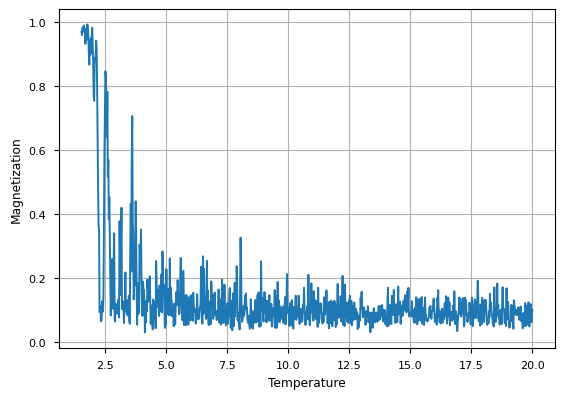

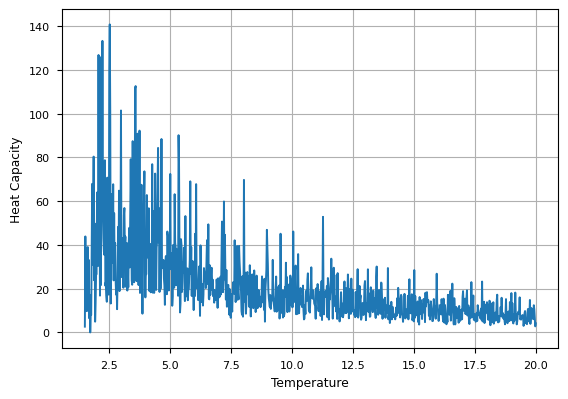

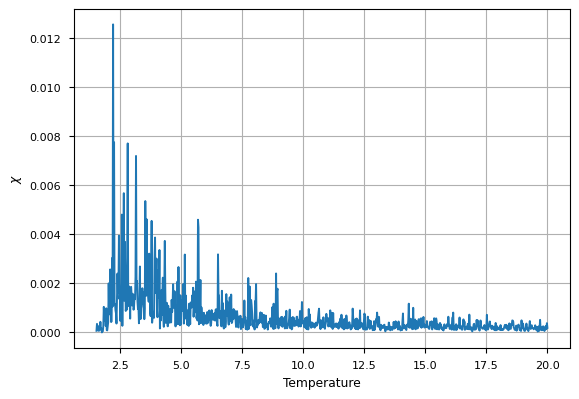

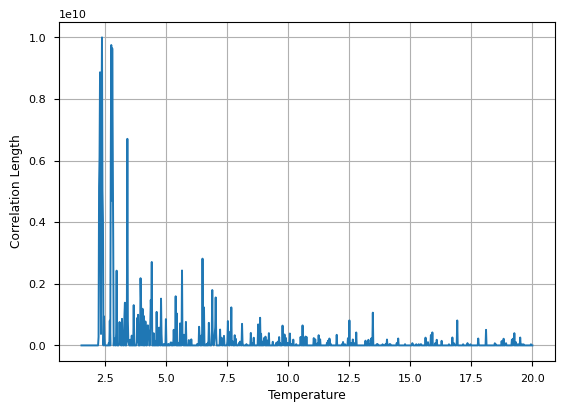

In [ ]:

sns.lineplot(x= T, y= mag)
plt.grid(True)
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.show()

sns.lineplot(x= T, y= c)
plt.grid(True)
plt.xlabel('Temperature')
plt.ylabel('Heat Capacity')
plt.show()

sns.lineplot(x= T, y= X)
plt.grid(True)
plt.xlabel('Temperature')
plt.ylabel('$\chi$')
plt.show()

sns.lineplot(x= T, y= corr_l)
plt.grid(True)
plt.xlabel('Temperature')
plt.ylabel('Correlation Length')
plt.show()


In [ ]:
L = np.arange(5,25)
T = np.arange(15, 0.5, -0.1)
data = pd.DataFrame(columns= ['Heat Capacity', '$\chi$', 'M', 'Correlation length','Temperature', 'Network size'])
for l in L:
  net = np.random.choice([-1, 1], size = (l, l))
  for t in T:
    I = IsingModel(net, [-1, 1], 1, t)
    I.MCstep(30 * l, 1000, False)
    net = I.net_
    data.loc[len(data)] = [np.var(I.energy_history) / t**2, np.var(I.magnetization_history) / t, I.m_avg, I.corr_len_avg, t, l]

agg_data = data.groupby('Network size').agg({'Heat Capacity':'max', '$\chi$': 'max', 'M': 'max', 'Correlation length': 'max'})


#now i add Temperature of the max correlation length to this result aswell
def find_max_corr_temp(group):
    max_corr_temp = group.loc[group['Correlation length'].idxmax(), 'Temperature']
    return pd.Series({'Max Correlation Temp': max_corr_temp})


max_corr_temp = data.groupby('Network size').apply(find_max_corr_temp)
final_result = pd.merge(agg_data, max_corr_temp, left_index=True, right_index=True)
final_result

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis

,Heat Capacity,$\chi$,M,Correlation length,Max Correlation Temp
Network size,,,,,
5.0,22.888532,0.028722,1.000000,0.000000e+00,15.0
6.0,43.860739,0.022844,0.972222,0.000000e+00,15.0
7.0,25.103660,0.013447,0.983673,0.000000e+00,15.0
8.0,43.654321,0.016821,1.000000,0.000000e+00,15.0
9.0,43.594265,0.008061,1.000000,0.000000e+00,15.0
10.0,80.658436,0.015554,0.993333,1.463415e+09,4.6
11.0,132.328635,0.010493,1.000000,8.593750e+09,3.2
12.0,77.953283,0.003688,0.995370,8.050847e+09,2.5
13.0,71.742883,0.002319,0.994083,4.351145e+09,2.7


<ipython-input-100-b0b6d62ed80f>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_result = final_result.applymap(lambda x: f'{x:.2e}')


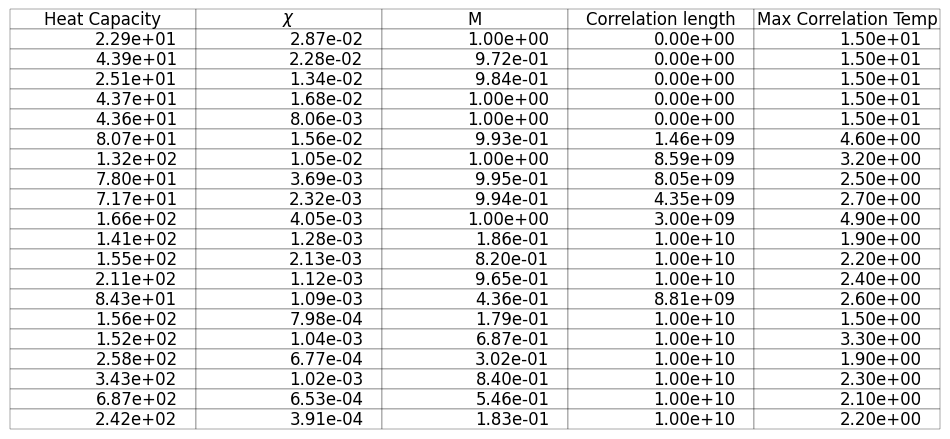

In [ ]:
final_result = final_result.applymap(lambda x: f'{x:.2e}')
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
table = ax.table(cellText=final_result.values, colLabels=final_result.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.show()

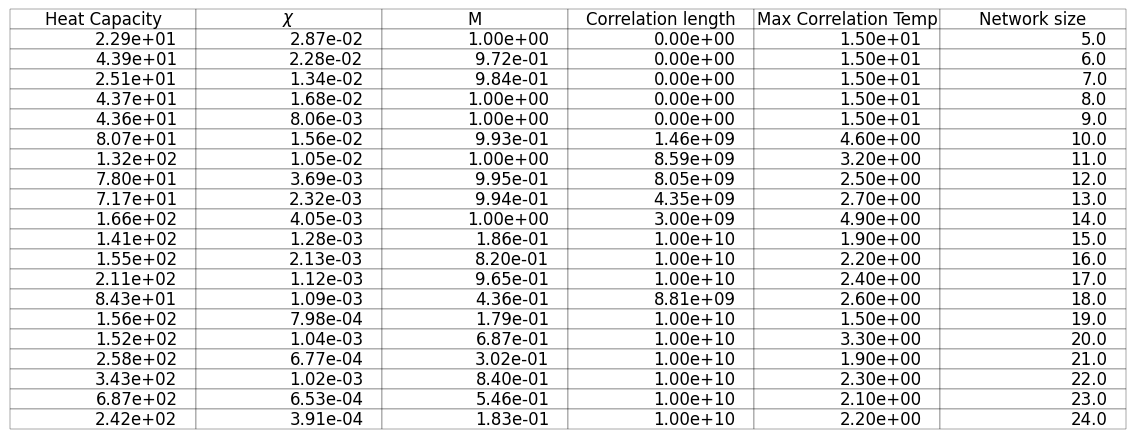

In [ ]:
final_result['Network size'] = final_result.index

fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')
table = ax.table(cellText=final_result.values, colLabels=final_result.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.show()

In [ ]:
#now lets solve the third part

T = np.arange(3, 1, -0.025)
L = np.arange(10, 24, 2)
data = pd.DataFrame(columns= ['Heat Capacity', '$\chi$', 'M', 'Correlation length','Temperature', 'Network size'])
for l in L:
  net = np.random.choice([-1, 1], size = (l, l))
  for t in T:
    I = IsingModel(net, [-1, 1], 1, t)
    I.MCstep(60 * l, 1000, False)
    net = I.net_
    data.loc[len(data)] = [np.var(I.energy_history) / t**2, np.var(I.magnetization_history) / t, I.m_avg, I.corr_len_avg, t, l]






/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis

In [ ]:
agg_data = data.groupby('Network size').agg({'Heat Capacity':'max', '$\chi$': 'max', 'M': 'max', 'Correlation length': 'max'})
max_corr_temp = data.groupby('Network size').apply(find_max_corr_temp)
final_result = pd.merge(agg_data, max_corr_temp, left_index=True, right_index=True)#now i have critical tempreture at each network size where
final_result['delta T'] = np.abs(final_result['Max Correlation Temp'] - 2.27)
model = LinearRegression()
X = np.log(final_result['delta T'].values.reshape(-1, 1))
y = np.log(final_result.index)
model.fit(X,y)
p = model.predict(X)

<ipython-input-122-a5db6942efe8>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_corr_temp = data.groupby('Network size').apply(find_max_corr_temp)


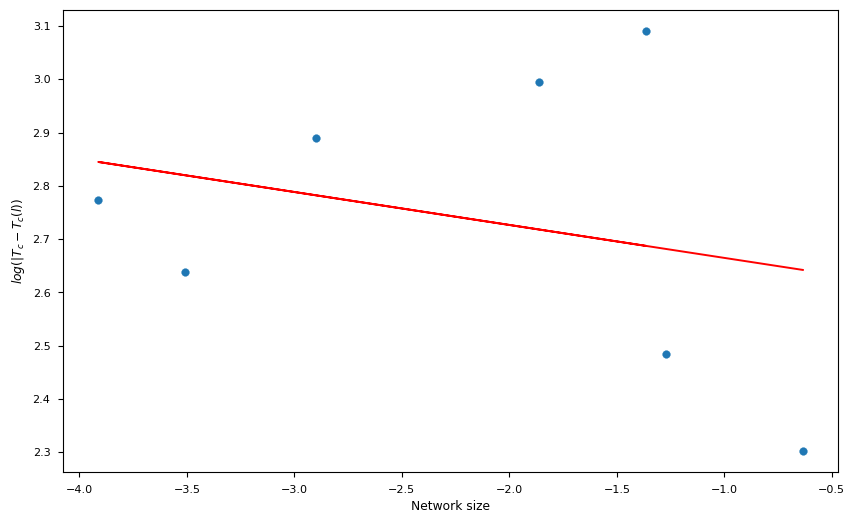

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label= 'Real data points')
plt.plot(X, p, color='red',label = 'prediction line')
plt.ylabel('$log(|T_c - T_c(l))$')
plt.xlabel('Network size')
plt.show()

In [ ]:
model.coef_[0]
nu = -1 / model.coef_[0]
nu#this result is very

np.float64(16.16453239217116)

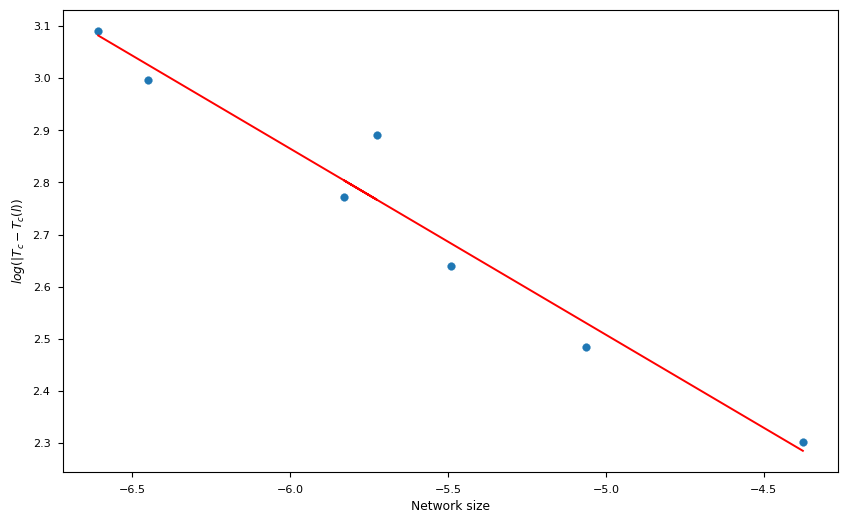

np.float64(-5.776770725606346)

In [ ]:
model = LinearRegression()
X = np.log(final_result['$\chi$'].values.reshape(-1, 1))
y = np.log(final_result.index)
model.fit(X,y)
p = model.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label= 'Real data points')
plt.plot(X, p, color='red',label = 'prediction line')
plt.ylabel('$log(|T_c - T_c(l))$')
plt.xlabel('Network size')
plt.show()
model.coef_[0] * nu

In [ ]:
model = LinearRegression()
X = np.log(final_result['M'].values.reshape(-1, 1))
y = np.log(final_result.index)
model.fit(X,y)
p = model.predict(X)

- model.coef_[0] * nu

np.float64(-1034.5486406056864)

In [ ]:
#for calculating c i use simulation result for L= 22 and plot c_v vs log(|T_c -T|)
D = data[(data['Network size'] == 22) & (data['Temperature'] > 1.5) & (data['Temperature'] < 2.5)]
D.dropna(inplace=True, axis=0, how = 'any')
model = LinearRegression()
X = np.log(np.abs((D['Temperature'] - 2.45)).values.reshape(-1, 1))
y = D['Heat Capacity'].values
model.fit(X,y)
p = model.predict(X)
model.coef_[0]

<ipython-input-155-596b8b9b7a7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D.dropna(inplace=True, axis=0, how = 'any')


np.float64(0.5487293182014334)

(-1+0j)